#**LOAD & INSPECT DATA**

In [ ]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/NWMPMARCH2024 (1).xlsx')

In [ ]:
data.columns

Index(['Station name', 'District', 'Monitoring date', 'Depth (mtrs.)',
       'Human activities', 'Water Temp (0C)', 'pH', 'Conductivity (uS/cm)',
       'Nitrate-N (mg/L)', 'Nitrite-N (mg/L)', 'Turbidity (NTU)',
       'Chloride (mg/L)', 'Hardness (mg/L)', 'TDS (mg/L)', 'Fluoride (mg/L)',
       'Major polluting sources', 'Use of water in downstream'],
      dtype='object')

In [ ]:
data.head(114)

,Station name,District,Monitoring date,Depth (mtrs.),Human activities,Water Temp (0C),pH,Conductivity (uS/cm),Nitrate-N (mg/L),Nitrite-N (mg/L),Turbidity (NTU),Chloride (mg/L),Hardness (mg/L),TDS (mg/L),Fluoride (mg/L),Major polluting sources,Use of water in downstream
0,"Nagavali River near NH-16 Bridge, Up stream of...",Srikakulam,2024-03-06,> 100cms,Others,32,8.29,392,0.48,0.06,9.7,35,168,254,0.6,Industrial,Agricultural purposes
1,Nagavali River near Water pump house (Killipal...,Srikakulam,2024-03-06,> 100cms,Others,32,8.15,417,1.52,0.15,11.5,40,168,288,0.38,Industrial,Agricultural purposes
2,"River Vamsadhara at Battili (V), Bhamini (M), ...",Parvathipuram Manyam District,2024-03-12,50-10cms,Others,34,7.97,290,0.01,BDL,8.1,20,140,192,0.16,Industrial,Agricultural purposes
3,"Sea Water,Bay of Bengal,after Confluence of ma...",Srikakulam,2024-03-06,>100cms,Others,30,7.88,47400,0.59,BDL,1.2,_,_,31432,0.38,Industrial,Fishing
4,"River Vamsadhara at Gara (V&M),\nSrikakulam",Srikakulam,2024-03-06,50-10cms,Others,32,8.02,355,0.35,BDL,9.7,35,144,234,0.25,Industrial,Agricultural\npurposes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,"Gargeyapuram lake, Gargeyapuram (V&M)",Kurnool,2024-03-02,> 100,Cattle wading,23,8.00,1130,0.50,0.14,4.2,140,240,635,0.7,Domestic /\nAgriculture,Irrigation
110,"Kotnur Cheruvu, Hindupuram, Satya Sai District",Sri Satya Sai,2024-03-03,50-100,Others,26,7.20,857,0.60,0.11,1.6,160,168,460,0.75,Domestic /\nAgriculture,Irrigation
111,"Kothacheruvu, Puttaparthy, Satya Sai District",Sri Satya Sai,2024-03-03,50-100,Others,25,7.20,1007,0.20,0.09,1.9,122,212,555,0.73,Domestic /\nAgriculture,Irrigation
112,"Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)",Annamayya,2024-03-02,50-100,Agriculture,23,8.20,1228,0.20,0.07,2.1,152,240,680,0.81,Domestic / Agriculture run off,Irrigation


In [ ]:
data.dtypes

,0
Station name,object
District,object
Monitoring date,datetime64[ns]
Depth (mtrs.),object
Human activities,object
Water Temp (0C),object
pH,float64
Conductivity (uS/cm),int64
Nitrate-N (mg/L),float64
Nitrite-N (mg/L),object


#**DATA CLEANING**

In [ ]:
print(data.isna().sum())

Station name                  0
District                      0
Monitoring date               0
Depth (mtrs.)                 0
Human activities              0
Water Temp (0C)               1
pH                            0
Conductivity (uS/cm)          0
Nitrate-N (mg/L)              0
Nitrite-N (mg/L)              0
Turbidity (NTU)               0
Chloride (mg/L)               0
Hardness (mg/L)               0
TDS (mg/L)                    0
Fluoride (mg/L)               0
Major polluting sources       6
Use of water in downstream    3
dtype: int64


In [ ]:
#Clean Depth column
def clean_depth(depth):
    depth = str(depth).lower().strip()  # Convert to lowercase and remove extra spaces

    # Handle feet values by converting them to meters
    if 'ft' in depth:
        feet_value = re.findall(r'\d+', depth)  # Find numeric value
        if feet_value:
            feet_to_meters = float(feet_value[0]) * 0.3048  # Convert to meters
            return round(feet_to_meters, 2)

    # Handle centimeter values by converting to meters
    if 'cm' in depth or 'cms' in depth:
        cm_value = re.findall(r'\d+', depth)  # Extract numeric value
        if cm_value:
            cm_to_meters = float(cm_value[0]) / 100  # Convert to meters
            return round(cm_to_meters, 2)

    # Handle range values like '50-100'
    if '-' in depth:
        range_values = re.findall(r'\d+', depth)  # Extract numeric values
        if range_values:
            avg_value = (float(range_values[0]) + float(range_values[1])) / 2
            return round(avg_value / 100, 2)  # Assuming these are in cm, convert to meters

    # Handle meters (mtr, mts)
    if 'mtr' in depth or 'mts' in depth:
        meter_value = re.findall(r'\d+', depth)  # Extract numeric value
        if meter_value:
            return float(meter_value[0])

    # Handle simple cases like '>100', '<100'
    if '>' in depth or '<' in depth:
        meter_value = re.findall(r'\d+', depth)  # Extract numeric value
        if meter_value:
            return float(meter_value[0]) / 100  # Assuming these are in cm

    # Return original value if no transformation was made
    return None

# Apply the function to the "Depth (mtrs.)" column
data['Depth (mtrs.)'] = data['Depth (mtrs.)'].apply(clean_depth)
data

,Station name,District,Monitoring date,Depth (mtrs.),Human activities,Water Temp (0C),pH,Conductivity (uS/cm),Nitrate-N (mg/L),Nitrite-N (mg/L),Turbidity (NTU),Chloride (mg/L),Hardness (mg/L),TDS (mg/L),Fluoride (mg/L),Major polluting sources,Use of water in downstream
0,"Nagavali River near NH-16 Bridge, Up stream of...",Srikakulam,2024-03-06,1.00,Others,32,8.29,392,0.48,0.06,9.7,35,168,254,0.6,Industrial,Agricultural purposes
1,Nagavali River near Water pump house (Killipal...,Srikakulam,2024-03-06,1.00,Others,32,8.15,417,1.52,0.15,11.5,40,168,288,0.38,Industrial,Agricultural purposes
2,"River Vamsadhara at Battili (V), Bhamini (M), ...",Parvathipuram Manyam District,2024-03-12,0.50,Others,34,7.97,290,0.01,BDL,8.1,20,140,192,0.16,Industrial,Agricultural purposes
3,"Sea Water,Bay of Bengal,after Confluence of ma...",Srikakulam,2024-03-06,1.00,Others,30,7.88,47400,0.59,BDL,1.2,_,_,31432,0.38,Industrial,Fishing
4,"River Vamsadhara at Gara (V&M),\nSrikakulam",Srikakulam,2024-03-06,0.50,Others,32,8.02,355,0.35,BDL,9.7,35,144,234,0.25,Industrial,Agricultural\npurposes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,"Gargeyapuram lake, Gargeyapuram (V&M)",Kurnool,2024-03-02,1.00,Cattle wading,23,8.00,1130,0.50,0.14,4.2,140,240,635,0.7,Domestic /\nAgriculture,Irrigation
110,"Kotnur Cheruvu, Hindupuram, Satya Sai District",Sri Satya Sai,2024-03-03,0.75,Others,26,7.20,857,0.60,0.11,1.6,160,168,460,0.75,Domestic /\nAgriculture,Irrigation
111,"Kothacheruvu, Puttaparthy, Satya Sai District",Sri Satya Sai,2024-03-03,0.75,Others,25,7.20,1007,0.20,0.09,1.9,122,212,555,0.73,Domestic /\nAgriculture,Irrigation
112,"Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)",Annamayya,2024-03-02,0.75,Agriculture,23,8.20,1228,0.20,0.07,2.1,152,240,680,0.81,Domestic / Agriculture run off,Irrigation


In [ ]:
#CLEAN HUMAN ACTS COLUMN

# Preview the 'Human activities' column
print(data['Human activities'].unique())

# Standardize values by defining a dictionary mapping inconsistent values to their clean versions
cleaning_map = {
    # Standardizing washing activities
    "Cloth\nwashings": "Cloth washing",
    "Cloth washings": "Cloth washing",  # Already clean
    "Bathing,\nCloth": "Bathing & Cloth washing",
    "Bathing,\ncloth washing,": "Bathing & Cloth washing",

    # Standardizing fishing activities
    "Fishing\n& Others": "Fishing & Others",
    "Fishing &\nOthers": "Fishing & Others",
    "Fishing": "Fishing",
    "Fishing & Others": "Fishing & Others",
    "Fishing & Agriculture": "Fishing & Agriculture",
    "Fishing & Bathing": "Fishing & Bathing",
    "Fishing & Industrial": "Fishing & Industrial",
    "Fishing and Cloth\nWashing.": "Fishing & Cloth washing",
    "Fishing & Salt\nManufacturin": "Fishing & Salt Manufacturing",

    # Standardizing agriculture activities
    "Agriculture": "Agriculture",
    "Domestic,\nAgriculture &": "Domestic & Agriculture",
    "Fishing & Agriculture": "Fishing & Agriculture",

    # Standardizing cattle wading activities
    "Cattle wading & Washing": "Cattle wading & Washing",
    "Cattle wading": "Cattle wading",
    "Cattle wading & Fishing": "Cattle wading & Fishing",
    "Cattle wading & Others": "Cattle wading & Others",

    # Handling miscellaneous or unclear entries
    "Others": "Others",
    "Others ": "Others",  # Leading/trailing spaces
    "Unknown": "Unknown",
    " - ": "Unknown",  # Empty values or dashes
    "_": "Unknown",  # Placeholder for missing values
    "----": "Unknown",  # Placeholder for missing values
    "-": "Unknown",  # Placeholder for missing values

    # Other variations to handle
    "Fishing & Others\n": "Fishing & Others",  # Handle newline at the end
    "Fishing &\nAgriculture": "Fishing & Agriculture",
    "Cattle wading & Others": "Cattle wading & Others",
    "Cattle wading & Fishing": "Cattle wading & Fishing",
}

# Apply the cleaning map to replace inconsistent values
data['Human activities'] = data['Human activities'].replace(cleaning_map, regex=True)

# Fill missing or undefined values with 'Unknown'
data['Human activities'].replace(["_", "-", "----"], "Unknown", inplace=True)

# Check for missing values and fill with 'Unknown'
data['Human activities'].fillna('Unknown', inplace=True)

# Verify changes
print(data['Human activities'].unique())

# Save the cleaned data to a new file (optional)
data.to_excel('cleaned_data.xlsx', index=False)


['Others' 'Fishing' 'Cattle wading & Others' 'Cloth\nwashings'
 'Cloth washings' 'Fishing &\nOthers' 'Fishing & Others'
 'Cattle wading & Washing' 'Fishing  & Bathing' 'Cattle wading\n& Fishing'
 'Cattle wading & Fishing' 'Agriculture' 'Bathing' '_' 'Bathing,\nCloth'
 'Fishing &\nAgriculture' 'Cattle\nWashing,' 'Bathing, cloth\nwashing,'
 'Fishing and Cloth\nWashing.' '----' 'Fishing & Salt\nManufacturin'
 'Domestic,\nAgriculture &' '-' 'Fishing & Agriculture'
 'Fishing &\nIndustrial' 'Cattle wading']
['Others' 'Fishing' 'Cattle wading & Others' 'Cloth washing'
 'Fishing & Others' 'Cattle wading & Washing' 'Fishing  & Bathing'
 'Cattle wading\n& Fishing' 'Cattle wading & Fishing' 'Agriculture'
 'Bathing' 'Unknown' 'Bathing & Cloth washing' 'Fishing & Agriculture'
 'Cattle\nWashing,' 'Bathing, cloth\nwashing,' 'Fishing & Cloth washing'
 'Fishing & Salt Manufacturing' 'Domestic & Agriculture'
 'Fishing &\nIndustrial' 'Cattle wading']


<ipython-input-9-336484ff4585>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Human activities'].replace(["_", "-", "----"], "Unknown", inplace=True)


In [ ]:
print(data['Human activities'].unique())
data

['Others' 'Fishing' 'Cattle wading & Others' 'Cloth washing'
 'Fishing & Others' 'Cattle wading & Washing' 'Fishing  & Bathing'
 'Cattle wading\n& Fishing' 'Cattle wading & Fishing' 'Agriculture'
 'Bathing' 'Unknown' 'Bathing & Cloth washing' 'Fishing & Agriculture'
 'Cattle\nWashing,' 'Bathing, cloth\nwashing,' 'Fishing & Cloth washing'
 'Fishing & Salt Manufacturing' 'Domestic & Agriculture'
 'Fishing &\nIndustrial' 'Cattle wading']


,Station name,District,Monitoring date,Depth (mtrs.),Human activities,Water Temp (0C),pH,Conductivity (uS/cm),Nitrate-N (mg/L),Nitrite-N (mg/L),Turbidity (NTU),Chloride (mg/L),Hardness (mg/L),TDS (mg/L),Fluoride (mg/L),Major polluting sources,Use of water in downstream
0,"Nagavali River near NH-16 Bridge, Up stream of...",Srikakulam,2024-03-06,1.00,Others,32,8.29,392,0.48,0.06,9.7,35,168,254,0.6,Industrial,Agricultural purposes
1,Nagavali River near Water pump house (Killipal...,Srikakulam,2024-03-06,1.00,Others,32,8.15,417,1.52,0.15,11.5,40,168,288,0.38,Industrial,Agricultural purposes
2,"River Vamsadhara at Battili (V), Bhamini (M), ...",Parvathipuram Manyam District,2024-03-12,0.50,Others,34,7.97,290,0.01,BDL,8.1,20,140,192,0.16,Industrial,Agricultural purposes
3,"Sea Water,Bay of Bengal,after Confluence of ma...",Srikakulam,2024-03-06,1.00,Others,30,7.88,47400,0.59,BDL,1.2,_,_,31432,0.38,Industrial,Fishing
4,"River Vamsadhara at Gara (V&M),\nSrikakulam",Srikakulam,2024-03-06,0.50,Others,32,8.02,355,0.35,BDL,9.7,35,144,234,0.25,Industrial,Agricultural\npurposes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,"Gargeyapuram lake, Gargeyapuram (V&M)",Kurnool,2024-03-02,1.00,Cattle wading,23,8.00,1130,0.50,0.14,4.2,140,240,635,0.7,Domestic /\nAgriculture,Irrigation
110,"Kotnur Cheruvu, Hindupuram, Satya Sai District",Sri Satya Sai,2024-03-03,0.75,Others,26,7.20,857,0.60,0.11,1.6,160,168,460,0.75,Domestic /\nAgriculture,Irrigation
111,"Kothacheruvu, Puttaparthy, Satya Sai District",Sri Satya Sai,2024-03-03,0.75,Others,25,7.20,1007,0.20,0.09,1.9,122,212,555,0.73,Domestic /\nAgriculture,Irrigation
112,"Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)",Annamayya,2024-03-02,0.75,Agriculture,23,8.20,1228,0.20,0.07,2.1,152,240,680,0.81,Domestic / Agriculture run off,Irrigation


In [ ]:
#CLEANING WATER TEMP COLUMN
print(data['Water Temp (0C)'].unique())
cleaning_map_temp = {
    # Standardizing numerical temperature values
    "32": 32,
    "34": 34,
    "30": 30,
    "27": 27,
    "31": 31,
    "29": 29,
    "35": 35,
    "23": 23,
    "26": 26,
    "28": 28,
    "25": 25,
    "24": 24,
    "22": 22,
    "21": 21,
    "20": 20,

    # Handling missing or unclear entries
    "_": np.nan,  # Placeholder for missing values
    "Unknown": np.nan,  # Placeholder for unknown entries
    "": np.nan,  # Empty values
    "N/A": np.nan,  # Not applicable
    "----": np.nan,  # Placeholder for missing values
    "-": np.nan,  # Placeholder for missing values
}

# Apply the cleaning map to replace inconsistent values
data['Water Temp (0C)'] = data['Water Temp (0C)'].replace(cleaning_map_temp)

# Fill missing or undefined values with 'Unknown'
data['Water Temp (0C)'].fillna(data['Water Temp (0C)'].mean(), inplace=True)

# Verify changes
print(data['Water Temp (0C)'].unique())
print(data)

[32 34 30 27 31 29 35 23 26 28 25 24 nan '_' 22 21 20]
[32.         34.         30.         27.         31.         29.
 35.         23.         26.         28.         25.         24.
 25.84821429 22.         21.         20.        ]
                                          Station name  \
0    Nagavali River near NH-16 Bridge, Up stream of...   
1    Nagavali River near Water pump house (Killipal...   
2    River Vamsadhara at Battili (V), Bhamini (M), ...   
3    Sea Water,Bay of Bengal,after Confluence of ma...   
4          River Vamsadhara at Gara (V&M),\nSrikakulam   
..                                                 ...   
109              Gargeyapuram lake, Gargeyapuram (V&M)   
110     Kotnur Cheruvu, Hindupuram, Satya Sai District   
111      Kothacheruvu, Puttaparthy, Satya Sai District   
112   Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)   
113          Thondamanadu Lake, Sri Kalahasthi Mandal,   

                          District Monitoring date  Depth (mtrs.)  \

<ipython-input-11-4990827bdd3a>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Water Temp (0C)'] = data['Water Temp (0C)'].replace(cleaning_map_temp)
<ipython-input-11-4990827bdd3a>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Water Temp (0C)'].fillna(data['Water Temp (0C)'].mean

In [ ]:
# CLEANING pH COLUMN
print(data['pH'].unique())
cleaning_map_ph = {
    # Standardizing numerical pH values
    "7.0": 7.0,
    "8.0": 8.0,
    "6.5": 6.5,
    "7.5": 7.5,
    "8.5": 8.5,
    "6.8": 6.8,
    "7.2": 7.2,
    "7.8": 7.8,
    "8.2": 8.2,

    # Handling missing or unclear entries
    "_": np.nan,
    "Unknown": np.nan,
    "N/A": np.nan,
    "": np.nan,
    "----": np.nan,
    "-": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['pH'] = data['pH'].replace(cleaning_map_ph)

# Fill missing or undefined values with 'Unknown'
data['pH'].fillna(data['pH'].mean(), inplace=True)

# Verify changes
print(data['pH'].unique())
print(data)

[8.29 8.15 7.97 7.88 8.02 8.12 8.3  8.04 7.74 7.75 7.86 7.78 7.6  7.22
 7.   7.89 8.46 8.25 6.05 7.98 7.82 7.9  7.96 7.81 8.2  7.66 8.26 7.43
 7.95 8.   7.55 7.71 8.28 7.79 7.77 7.92 7.73 7.76 8.07 7.8  8.03 7.57
 7.42 7.58 8.01 7.38 7.34 7.51 7.46 7.63 7.37 8.09 7.69 8.14 7.52 7.62
 7.93 7.53 7.67 8.1  7.5  7.2  7.7 ]
[8.29 8.15 7.97 7.88 8.02 8.12 8.3  8.04 7.74 7.75 7.86 7.78 7.6  7.22
 7.   7.89 8.46 8.25 6.05 7.98 7.82 7.9  7.96 7.81 8.2  7.66 8.26 7.43
 7.95 8.   7.55 7.71 8.28 7.79 7.77 7.92 7.73 7.76 8.07 7.8  8.03 7.57
 7.42 7.58 8.01 7.38 7.34 7.51 7.46 7.63 7.37 8.09 7.69 8.14 7.52 7.62
 7.93 7.53 7.67 8.1  7.5  7.2  7.7 ]
                                          Station name  \
0    Nagavali River near NH-16 Bridge, Up stream of...   
1    Nagavali River near Water pump house (Killipal...   
2    River Vamsadhara at Battili (V), Bhamini (M), ...   
3    Sea Water,Bay of Bengal,after Confluence of ma...   
4          River Vamsadhara at Gara (V&M),\nSrikakulam   
..        

<ipython-input-12-e8e22119767b>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pH'].fillna(data['pH'].mean(), inplace=True)


In [ ]:
#CONDUCTIVITY
# CLEANING Conductivity (uS/cm) COLUMN
print(data['Conductivity (uS/cm)'].unique())
cleaning_map_conductivity = {
    # Standardizing numerical conductivity values
    "392": 392,
    "417": 417,
    "290": 290,
    "47400": 47400,
    "355": 355,
    "542": 542,
    "6071": 6071,
    "460": 460,
    "366": 366,
    "327": 327,
    "48800": 48800,
    "239": 239,
    "1133": 1133,
    "533": 533,
    "135": 135,
    "144": 144,
    "805": 805,
    "341": 341,
    "49200": 49200,
    "603": 603,
    "49600": 49600,
    "43300": 43300,
    "48700": 48700,
    "48500": 48500,
    "28600": 28600,
    "48400": 48400,
    "236": 236,
    "322": 322,
    "1907": 1907,
    "255": 255,
    "242": 242,
    "1787": 1787,
    "232": 232,
    "40700": 40700,
    "49200": 49200,
    "2580": 2580,
    "39900": 39900,
    "5930": 5930,
    "823": 823,
    "31900": 31900,
    "354": 354,
    "243": 243,
    "292": 292,
    "48300": 48300,
    "47300": 47300,
    "44600": 44600,
    "15690": 15690,
    "47800": 47800,
    "256": 256,
    "47200": 47200,
    "252": 252,
    "27900": 27900,
    "37100": 37100,
    "265": 265,
    "47000": 47000,
    "1752": 1752,
    "1482": 1482,
    "351": 351,
    "253": 253,
    "977": 977,
    "1072": 1072,
    "840": 840,
    "781": 781,
    "28200": 28200,
    "994": 994,
    "1076": 1076,
    "1576": 1576,
    "2060": 2060,
    "1186": 1186,
    "845": 845,
    "887": 887,
    "51600": 51600,
    "52300": 52300,
    "49200": 49200,
    "352": 352,
    "34400": 34400,
    "56000": 56000,
    "924": 924,
    "37100": 37100,
    "1316": 1316,
    "820": 820,
    "420": 420,
    "1173": 1173,
    "842": 842,
    "44300": 44300,
    "54460": 54460,
    "49600": 49600,
    "38300": 38300,
    "41700": 41700,
    "1480": 1480,
    "1064": 1064,
    "1215": 1215,
    "33360": 33360,
    "810": 810,
    "1704": 1704,
    "1845": 1845,
    "77": 77,
    "508": 508,
    "1490": 1490,
    "670": 670,
    "1420": 1420,
    "1320": 1320,
    "628": 628,
    "930": 930,
    "1440": 1440,
    "629": 629,
    "1648": 1648,
    "1465": 1465,
    "698": 698,
    "1130": 1130,
    "857": 857,
    "1007": 1007,
    "1228": 1228,
    "772": 772,

    # Handling missing or unclear entries
    "_": np.nan,
    "Unknown": np.nan,
    "N/A": np.nan,
    "": np.nan,
    "----": np.nan,
    "-": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Conductivity (uS/cm)'] = data['Conductivity (uS/cm)'].replace(cleaning_map_conductivity)

# Fill missing or undefined values with 'Unknown'
data['Conductivity (uS/cm)'].fillna(data['Conductivity (uS/cm)'].mean(), inplace=True)

# Verify changes
print(data['Conductivity (uS/cm)'].unique())
print(data)

[  392   417   290 47400   355   542  6071   460   366   327 48800   239
  1133   533   135   144   805   341 49200   603 49600 43300 48700 48500
 28600 48400   236   322  1907   255   242  1787   232 40700  2580 39900
  5930   823 31900   354   243   292 48300 47300 44600 15690 47800   256
 47200   252 27900 37100   265 47000  1752  1482   351   253   977  1072
   840   781 28200   994  1076  1576  2060  1186   845   887 51600 52300
   352 34400 56000   924  1316   820   420  1173   842 44300 54460 38300
 41700  1480  1064  1215 33360   810  1704  1845    77   508  1490   670
  1420  1320   628   930  1440   629  1648  1465   698  1130   857  1007
  1228   772]
[  392   417   290 47400   355   542  6071   460   366   327 48800   239
  1133   533   135   144   805   341 49200   603 49600 43300 48700 48500
 28600 48400   236   322  1907   255   242  1787   232 40700  2580 39900
  5930   823 31900   354   243   292 48300 47300 44600 15690 47800   256
 47200   252 27900 37100   265 47000 

<ipython-input-13-e5cbad9dcf3a>:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Conductivity (uS/cm)'].fillna(data['Conductivity (uS/cm)'].mean(), inplace=True)


                                          Station name  \
0    Nagavali River near NH-16 Bridge, Up stream of...   
1    Nagavali River near Water pump house (Killipal...   
2    River Vamsadhara at Battili (V), Bhamini (M), ...   
3    Sea Water,Bay of Bengal,after Confluence of ma...   
4          River Vamsadhara at Gara (V&M),\nSrikakulam   
..                                                 ...   
109              Gargeyapuram lake, Gargeyapuram (V&M)   
110     Kotnur Cheruvu, Hindupuram, Satya Sai District   
111      Kothacheruvu, Puttaparthy, Satya Sai District   
112   Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)   
113          Thondamanadu Lake, Sri Kalahasthi Mandal,   

                          District Monitoring date  Depth (mtrs.)  \
0                       Srikakulam      2024-03-06           1.00   
1                       Srikakulam      2024-03-06           1.00   
2    Parvathipuram Manyam District      2024-03-12           0.50   
3                       Sri

In [ ]:
# CLEANING Nitrate-N (mg/L) COLUMN
print(data['Nitrate-N (mg/L)'].unique())
cleaning_map_nitrate = {
    # Standardizing numerical nitrate values
    "0.48": 0.48,
    "1.52": 1.52,
    "0.01": 0.01,
    "0.59": 0.59,
    "0.35": 0.35,
    "1.68": 1.68,
    "1.95": 1.95,
    "1.28": 1.28,
    "0.98": 0.98,
    "0.77": 0.77,
    "0.61": 0.61,
    "0.30": 0.30,
    "2.01": 2.01,
    "1.31": 1.31,
    "0.42": 0.42,
    "2.30": 2.30,
    "0.53": 0.53,
    "0.82": 0.82,
    "0.50": 0.50,
    "1.86": 1.86,
    "0.38": 0.38,
    "2.58": 2.58,
    "0.47": 0.47,
    "0.74": 0.74,
    "1.16": 1.16,
    "0.43": 0.43,
    "0.33": 0.33,
    "1.10": 1.10,
    "0.72": 0.72,
    "1.24": 1.24,
    "0.96": 0.96,
    "2.17": 2.17,
    "2.33": 2.33,
    "0.64": 0.64,
    "0.89": 0.89,
    "0.55": 0.55,
    "0.69": 0.69,
    "1.14": 1.14,
    "0.40": 0.40,
    "0.65": 0.65,
    "0.27": 0.27,
    "1.77": 1.77,
    "1.62": 1.62,
    "0.88": 0.88,
    "12.29": 12.29,
    "10.61": 10.61,
    "1.18": 1.18,
    "1.39": 1.39,
    "0.91": 0.91,
    "1.40": 1.40,
    "1.83": 1.83,
    "6.24": 6.24,
    "8.93": 8.93,
    "1.32": 1.32,
    "1.23": 1.23,
    "1.48": 1.48,
    "0.84": 0.84,
    "1.19": 1.19,
    "1.43": 1.43,
    "3.94": 3.94,
    "2.34": 2.34,
    "1.22": 1.22,
    "0.92": 0.92,
    "2.46": 2.46,
    "1.56": 1.56,
    "1.53": 1.53,
    "1.13": 1.13,
    "0.5": 0.50,
    "0.2": 0.20,
    "0.6": 0.60,
    "0.1": 0.10,
    "1.7": 1.70,
    "0.7": 0.70,
    "0.8": 0.80,
    "0.9": 0.90,
    "0.3": 0.30,

    # Handling missing or unclear entries
    "_": np.nan,
    "Unknown": np.nan,
    "N/A": np.nan,
    "": np.nan,
    "----": np.nan,
    "-": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Nitrate-N (mg/L)'] = data['Nitrate-N (mg/L)'].replace(cleaning_map_nitrate)

# Fill missing or undefined values with -1
data['Nitrate-N (mg/L)'].fillna(data['Nitrate-N (mg/L)'].mean(), inplace=True)

# Verify changes
print(data['Nitrate-N (mg/L)'].unique())
print(data)


[4.800e-01 1.520e+00 1.000e-02 5.900e-01 3.500e-01 1.680e+00 1.950e+00
 1.280e+00 9.800e-01 7.700e-01 6.100e-01 3.000e-01 2.010e+00 1.310e+00
 4.200e-01 2.300e+00 5.300e-01 8.200e-01 5.000e-01 1.860e+00 3.800e-01
 2.580e+00 4.700e-01 7.400e-01 1.160e+00 4.300e-01 3.300e-01 1.100e+00
 4.900e-01 7.200e-01 1.240e+00 9.600e-01 2.170e+00 2.330e+00 6.400e-01
 8.900e-01 5.500e-01 6.900e-01 8.600e-01 1.140e+00 4.000e-01 6.500e-01
 2.700e-01 7.000e-01 5.200e-01 1.770e+00 1.620e+00 8.800e-01 7.300e-01
 1.229e+01 1.061e+01 1.180e+00 1.390e+00 9.100e-01 1.400e+00 1.830e+00
 6.240e+00 8.930e+00 1.320e+00 1.230e+00 1.480e+00 8.400e-01 1.190e+00
 1.430e+00 3.940e+00 1.370e+00 2.340e+00 1.220e+00 9.200e-01 2.460e+00
 1.560e+00 1.530e+00 1.130e+00 2.000e-01 6.000e-01 1.000e-01 1.700e+00
 8.000e-01 9.000e-01]
[4.800e-01 1.520e+00 1.000e-02 5.900e-01 3.500e-01 1.680e+00 1.950e+00
 1.280e+00 9.800e-01 7.700e-01 6.100e-01 3.000e-01 2.010e+00 1.310e+00
 4.200e-01 2.300e+00 5.300e-01 8.200e-01 5.000e-01 1.86

<ipython-input-14-9cebd32ff396>:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Nitrate-N (mg/L)'].fillna(data['Nitrate-N (mg/L)'].mean(), inplace=True)


In [ ]:
# CLEANING Nitrite-N (mg/L) COLUMN
print(data['Nitrite-N (mg/L)'].unique())
cleaning_map_nitrite = {
    # Standardizing numerical nitrite values
    "0.06": 0.06,
    "0.15": 0.15,
    "BDL": 0,  # BDL (Below Detection Limit) mapped to 0
    "0.09": 0.09,
    "0.01": 0.01,
    "0.08": 0.08,
    "0.02": 0.02,
    "0.37": 0.37,
    "0.36": 0.36,
    "0.20": 0.20,
    "0.04": 0.04,
    "0.10": 0.10,
    "0.13": 0.13,
    "0.11": 0.11,
    "0.12": 0.12,
    "0.07": 0.07,
    "0.03": 0.03,
    "0.98": 0.98,
    "0.27": 0.27,
    "0.44": 0.44,
    "0.19": 0.19,
    "0.93": 0.93,
    "0.64": 0.64,
    "0.32": 0.32,
    "0.28": 0.28,
    "0.16": 0.16,
    "0.14": 0.14,
    "0.18": 0.18,
    "0.05": 0.05,

    # Handling missing or unclear entries
    "_": np.nan,
    "Unknown": np.nan,
    "N/A": np.nan,
    "": np.nan,
    "----": np.nan,
    "-": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Nitrite-N (mg/L)'] = data['Nitrite-N (mg/L)'].replace(cleaning_map_nitrite)

# Fill missing or undefined values with -1
data['Nitrite-N (mg/L)'].fillna(data['Nitrite-N (mg/L)'].mean(), inplace=True)

# Verify changes
print(data['Nitrite-N (mg/L)'].unique())
print(data)

[0.06 0.15 'BDL' 0.09 0.01 0.08 0.02 0.37 0.36 0.2 0.04 0.1 0.13 0.11 0.12
 0.07 0.03 0.98 0.27 0.44 0.19 0.93 0.64 0.05 0.32 0.28 0.16 0.14 0.18]
[0.06 0.15 0.   0.09 0.01 0.08 0.02 0.37 0.36 0.2  0.04 0.1  0.13 0.11
 0.12 0.07 0.03 0.98 0.27 0.44 0.19 0.93 0.64 0.05 0.32 0.28 0.16 0.14
 0.18]
                                          Station name  \
0    Nagavali River near NH-16 Bridge, Up stream of...   
1    Nagavali River near Water pump house (Killipal...   
2    River Vamsadhara at Battili (V), Bhamini (M), ...   
3    Sea Water,Bay of Bengal,after Confluence of ma...   
4          River Vamsadhara at Gara (V&M),\nSrikakulam   
..                                                 ...   
109              Gargeyapuram lake, Gargeyapuram (V&M)   
110     Kotnur Cheruvu, Hindupuram, Satya Sai District   
111      Kothacheruvu, Puttaparthy, Satya Sai District   
112   Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)   
113          Thondamanadu Lake, Sri Kalahasthi Mandal,   

       

<ipython-input-15-929bbfad0bf9>:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Nitrite-N (mg/L)'] = data['Nitrite-N (mg/L)'].replace(cleaning_map_nitrite)
<ipython-input-15-929bbfad0bf9>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Nitrite-N (mg/L)'].fillna(data['Nitrite-N (mg/L)

In [ ]:
# CLEANING Turbidity (NTU) COLUMN
print(data['Turbidity (NTU)'].unique())
cleaning_map_turbidity = {
    # Standardizing numerical turbidity values
    "9.7": 9.7,
    "11.5": 11.5,
    "8.1": 8.1,
    "1.2": 1.2,
    "4.6": 4.6,
    "18.7": 18.7,
    "10.1": 10.1,
    "12.3": 12.3,
    "24.2": 24.2,
    "3.5": 3.5,
    "7.8": 7.8,
    "11.3": 11.3,
    "9.2": 9.2,
    "4.8": 4.8,
    "6.8": 6.8,
    "16.4": 16.4,
    "2.1": 2.1,
    "7.6": 7.6,
    "1.9": 1.9,
    "10.2": 10.2,
    "5.3": 5.3,
    "1.3": 1.3,
    "1.6": 1.6,
    "5.2": 5.2,
    "21.3": 21.3,
    "3.7": 3.7,
    "4.1": 4.1,
    "18.4": 18.4,
    "15.6": 15.6,
    "5.7": 5.7,
    "12.4": 12.4,
    "13.2": 13.2,
    "13.8": 13.8,
    "5.9": 5.9,
    "2.6": 2.6,
    "8.3": 8.3,
    "30.6": 30.6,
    "17.4": 17.4,
    "9.6": 9.6,
    "6.2": 6.2,
    "8.2": 8.2,
    "4.2": 4.2,
    "12.7": 12.7,
    "29.3": 29.3,
    "16.6": 16.6,
    "20.4": 20.4,
    "15.1": 15.1,
    "64.5": 64.5,
    "19.2": 19.2,
    "4.83": 4.83,
    "5.92": 5.92,
    "5.94": 5.94,
    "4.96": 4.96,
    "6.52": 6.52,
    "26": 26,
    "44": 44,
    "6.0": 6.0,
    "4.80": 4.80,
    "5.26": 5.26,

    # Handling missing or unclear entries
    "---": np.nan,

    # Additional values
    "3.93": 3.93,
    "13": 13,
    "4.52": 4.52,
    "6.34": 6.34,
    "7.48": 7.48,
    "5.0": 5.0,
    "6.64": 6.64,
    "6.39": 6.39,
    "5.24": 5.24,
    "1.4": 1.4,
    "1.8": 1.8,
    "2.2": 2.2,
    "1.7": 1.7,
    "0.8": 0.8,
    "1.1": 1.1,
    "0.7": 0.7,
    "0.5": 0.5,
    "2.0": 2.0,
    "2.4": 2.4,
    "3.1": 3.1,

    # Handling empty values
    "": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Turbidity (NTU)'] = data['Turbidity (NTU)'].replace(cleaning_map_turbidity)

# Fill missing or undefined values with -1
data['Turbidity (NTU)'].fillna(data['Turbidity (NTU)'].mean(), inplace=True)

# Verify changes
print(data['Turbidity (NTU)'].unique())
print(data)

[9.7 11.5 8.1 1.2 4.6 18.7 10.1 12.3 24.2 3.5 7.8 11.3 9.2 4.8 6.8 16.4
 2.1 7.6 1.9 10.2 5.3 1.3 1.6 5.2 21.3 3.7 4.1 18.4 15.6 5.7 3.4 12.4 13.2
 13.8 5.9 2.6 8.3 30.6 17.4 9.6 6.2 8.2 4.2 12.7 29.3 16.6 20.4 15.1 64.5
 19.2 4.83 5.92 5.94 4.96 6.52 26 44 6 5.26 '---' 3.93 13 4.52 6.34 7.48 5
 6.64 6.39 5.24 1.4 1.8 2.2 1.7 0.8 1.1 0.7 1.5 0.5 2 2.4 3.1]
[ 9.7        11.5         8.1         1.2         4.6        18.7
 10.1        12.3        24.2         3.5         7.8        11.3
  9.2         4.8         6.8        16.4         2.1         7.6
  1.9        10.2         5.3         1.3         1.6         5.2
 21.3         3.7         4.1        18.4        15.6         5.7
  3.4        12.4        13.2        13.8         5.9         2.6
  8.3        30.6        17.4         9.6         6.2         8.2
  4.2        12.7        29.3        16.6        20.4        15.1
 64.5        19.2         4.83        5.92        5.94        4.96
  6.52       26.         44.          6.      

<ipython-input-16-5041e5326af8>:95: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Turbidity (NTU)'] = data['Turbidity (NTU)'].replace(cleaning_map_turbidity)
<ipython-input-16-5041e5326af8>:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Turbidity (NTU)'].fillna(data['Turbidity (NTU)']

In [ ]:
# CLEANING Chloride (mg/L) COLUMN
print(data['Chloride (mg/L)'].unique())
cleaning_map_chloride = {
    # Standardizing numerical chloride values
    "35": 35,
    "40": 40,
    "20": 20,
    "100": 100,
    "550": 550,
    "65": 65,
    "30": 30,
    "25": 25,
    "275": 275,
    "85": 85,
    "15": 15,
    "145": 145,
    "50": 50,
    "485": 485,
    "465": 465,
    "1795": 1795,
    "140": 140,
    "8200": 8200,
    "116": 116,
    "256": 256,
    "323": 323,
    "154": 154,
    "98": 98,
    "92": 92,
    "44": 44,
    "123": 123,
    "12361": 12361,
    "192": 192,
    "48": 48,
    "219": 219,
    "94": 94,
    "13179": 13179,
    "222": 222,
    "138": 138,
    "176": 176,
    "10500": 10500,
    "262": 262,
    "242": 242,
    "15": 15,
    "64": 64,
    "230": 230,
    "70": 70,
    "212": 212,
    "220": 220,
    "72": 72,
    "112": 112,
    "216": 216,
    "284": 284,
    "246": 246,
    "88": 88,
    "160": 160,
    "122": 122,
    "152": 152,
    "106": 106,

    # Handling missing or unclear entries
    "_": np.nan,
    "---": np.nan,

    # Handling empty values
    "": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Chloride (mg/L)'] = data['Chloride (mg/L)'].replace(cleaning_map_chloride)

# Fill missing or undefined values with -1
data['Chloride (mg/L)'].fillna(data['Chloride (mg/L)'].mean(), inplace=True)

# Verify changes
print(data['Chloride (mg/L)'].unique())
print(data)

[35 40 20 '_' 100 550 65 30 25 275 85 15 145 50 485 465 1795 140 425 350
 55 98 104 8200 116 256 323 154 92 '---' 44 123 12361 192 48 219 94 13179
 222 138 176 10500 262 242 64 230 70 212 220 72 112 216 284 246 88 160 122
 152 106]
[   35.            40.            20.           706.46835443
   100.           550.            65.            30.
    25.           275.            85.            15.
   145.            50.           485.           465.
  1795.           140.           425.           350.
    55.            98.           104.          8200.
   116.           256.           323.           154.
    92.            44.           123.         12361.
   192.            48.           219.            94.
 13179.           222.           138.           176.
 10500.           262.           242.            64.
   230.            70.           212.           220.
    72.           112.           216.           284.
   246.            88.           160.           122.
   152.           

<ipython-input-17-08f95ceebb37>:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Chloride (mg/L)'] = data['Chloride (mg/L)'].replace(cleaning_map_chloride)
<ipython-input-17-08f95ceebb37>:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Chloride (mg/L)'].fillna(data['Chloride (mg/L)'].

                                          Station name  \
0    Nagavali River near NH-16 Bridge, Up stream of...   
1    Nagavali River near Water pump house (Killipal...   
2    River Vamsadhara at Battili (V), Bhamini (M), ...   
3    Sea Water,Bay of Bengal,after Confluence of ma...   
4          River Vamsadhara at Gara (V&M),\nSrikakulam   
..                                                 ...   
109              Gargeyapuram lake, Gargeyapuram (V&M)   
110     Kotnur Cheruvu, Hindupuram, Satya Sai District   
111      Kothacheruvu, Puttaparthy, Satya Sai District   
112   Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)   
113          Thondamanadu Lake, Sri Kalahasthi Mandal,   

                          District Monitoring date  Depth (mtrs.)  \
0                       Srikakulam      2024-03-06           1.00   
1                       Srikakulam      2024-03-06           1.00   
2    Parvathipuram Manyam District      2024-03-12           0.50   
3                       Sri

In [ ]:
# CLEANING Hardness (mg/L) COLUMN
print(data['Hardness (mg/L)'].unique())
cleaning_map_hardness = {
    # Standardizing numerical hardness values
    "168": 168,
    "140": 140,
    "144": 144,
    "120": 120,
    "536": 536,
    "148": 148,
    "152": 152,
    "116": 116,
    "320": 320,
    "220": 220,
    "60": 60,
    "80": 80,
    "248": 248,
    "172": 172,
    "112": 112,
    "440": 440,
    "468": 468,
    "1740": 1740,
    "132": 132,
    "100": 100,
    "384": 384,
    "216": 216,
    "204": 204,
    "4460": 4460,
    "244": 244,
    "256": 256,
    "376": 376,
    "584": 584,
    "312": 312,
    "4280": 4280,
    "264": 264,
    "146": 146,
    "228": 228,
    "232": 232,
    "4780": 4780,
    "260": 260,
    "236": 236,
    "3620": 3620,
    "192": 192,
    "364": 364,
    "340": 340,
    "23": 23,
    "296": 296,
    "160": 160,
    "276": 276,
    "184": 184,
    "224": 224,
    "252": 252,
    "304": 304,
    "268": 268,
    "164": 164,
    "240": 240,
    "188": 188,

    # Handling missing or unclear entries
    "_": np.nan,
    "---": np.nan,

    # Handling empty values
    "": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Hardness (mg/L)'] = data['Hardness (mg/L)'].replace(cleaning_map_hardness)

# Fill missing or undefined values with -1
data['Hardness (mg/L)'].fillna(data['Hardness (mg/L)'].mean(), inplace=True)

# Verify changes
print(data['Hardness (mg/L)'].unique())
print(data)

[168 140 '_' 144 120 536 148 152 116 320 220 60 80 248 172 112 440 468
 1740 132 100 384 216 204 4460 244 256 376 584 312 '---' 128 240 4280 264
 212 146 228 232 4780 260 236 3620 192 364 340 23 296 160 276 184 224 252
 304 268 164 188]
[ 168.          140.          440.82278481  144.          120.
  536.          148.          152.          116.          320.
  220.           60.           80.          248.          172.
  112.          440.          468.         1740.          132.
  100.          384.          216.          204.         4460.
  244.          256.          376.          584.          312.
  128.          240.         4280.          264.          212.
  146.          228.          232.         4780.          260.
  236.         3620.          192.          364.          340.
   23.          296.          160.          276.          184.
  224.          252.          304.          268.          164.
  188.        ]
                                          Station name

<ipython-input-18-8554f0586717>:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Hardness (mg/L)'] = data['Hardness (mg/L)'].replace(cleaning_map_hardness)
<ipython-input-18-8554f0586717>:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Hardness (mg/L)'].fillna(data['Hardness (mg/L)'].

In [ ]:
# CLEANING TDS (mg/L) COLUMN
print(data['TDS (mg/L)'].unique())

cleaning_map_tds = {
    # Standardizing numerical TDS values
    "254": 254,
    "288": 288,
    "192": 192,
    "31432": 31432,
    "234": 234,
    "368": 368,
    "4052": 4052,
    "312": 312,
    "256": 256,
    "224": 224,
    "32120": 32120,
    "168": 168,
    "742": 742,
    "350": 350,
    "92": 92,
    "112": 112,
    "550": 550,
    "232": 232,
    "32224": 32224,
    "412": 412,
    "32836": 32836,
    "28428": 28428,
    "31976": 31976,
    "31844": 31844,
    "18944": 18944,
    "31860": 31860,
    "160": 160,
    "220": 220,
    "1260": 1260,
    "180": 180,
    "172": 172,
    "1204": 1204,
    "164": 164,
    "27128": 27128,
    "32344": 32344,
    "1716": 1716,
    "26296": 26296,
    "3780": 3780,
    "530": 530,
    "21436": 21436,
    "244": 244,
    "194": 194,
    "32125": 32125,
    "31456": 31456,
    "29220": 29220,
    "10448": 10448,
    "31536": 31536,
    "184": 184,
    "31856": 31856,
    "170": 170,
    "18624": 18624,
    "24576": 24576,
    "31748": 31748,
    "1156": 1156,
    "965": 965,
    "656": 656,
    "712": 712,
    "512": 512,
    "478": 478,
    "17500": 17500,
    "606": 606,
    "664": 664,
    "994": 994,
    "1318": 1318,
    "730": 730,
    "520": 520,
    "524": 524,
    "33000": 33000,
    "33500": 33500,
    "30100": 30100,
    "206": 206,
    "22100": 22100,
    "35800": 35800,
    "570": 570,
    "24480": 24480,
    "829": 829,
    "508": 508,
    "246": 246,
    "738": 738,
    "28350": 28350,
    "35900": 35900,
    "32730": 32730,
    "24500": 24500,
    "26200": 26200,
    "850": 850,
    "595": 595,
    "702": 702,
    "19290": 19290,
    "458": 458,
    "982": 982,
    "1050": 1050,
    "41": 41,
    "285": 285,
    "835": 835,
    "366": 366,
    "785": 785,
    "755": 755,
    "345": 345,
    "525": 525,
    "830": 830,
    "905": 905,
    "798": 798,
    "390": 390,
    "635": 635,
    "460": 460,
    "555": 555,
    "680": 680,
    "410": 410,

    # Handling missing or unclear entries
    "_": np.nan,
    "---": np.nan,

    # Handling empty values
    "": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['TDS (mg/L)'] = data['TDS (mg/L)'].replace(cleaning_map_tds)

# Fill missing or undefined values with -1
data['TDS (mg/L)'].fillna(data['TDS (mg/L)'].mean(), inplace=True)

# Verify changes
print(data['TDS (mg/L)'].unique())
print(data)

[  254   288   192 31432   234   368  4052   312   256   224 32120   168
   742   350    92   112   550   232 32224   412 32836 28428 31976 31844
 18944 31860   160   220  1260   180   172  1204   164 27128 32344  1716
 26296  3780   530 21436   244   194 32125 31456 29220 10448 31536   184
 31856   170 18624 24576 31748  1156   965   656   712   512   478 17500
   606   664   994  1318   730   520   524 33000 33500 30100   206 22100
 35800   570 24480   829   508   246   738   522 28350 35900 32730 24500
 26200   850   595   702 19290   458   982  1050    41   285   835   366
   785   755   345   525   830   905   798   390   635   460   555   680
   410]
[  254   288   192 31432   234   368  4052   312   256   224 32120   168
   742   350    92   112   550   232 32224   412 32836 28428 31976 31844
 18944 31860   160   220  1260   180   172  1204   164 27128 32344  1716
 26296  3780   530 21436   244   194 32125 31456 29220 10448 31536   184
 31856   170 18624 24576 31748  1156   965 

<ipython-input-19-e16a25bde9fe>:127: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TDS (mg/L)'].fillna(data['TDS (mg/L)'].mean(), inplace=True)


                                          Station name  \
0    Nagavali River near NH-16 Bridge, Up stream of...   
1    Nagavali River near Water pump house (Killipal...   
2    River Vamsadhara at Battili (V), Bhamini (M), ...   
3    Sea Water,Bay of Bengal,after Confluence of ma...   
4          River Vamsadhara at Gara (V&M),\nSrikakulam   
..                                                 ...   
109              Gargeyapuram lake, Gargeyapuram (V&M)   
110     Kotnur Cheruvu, Hindupuram, Satya Sai District   
111      Kothacheruvu, Puttaparthy, Satya Sai District   
112   Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)   
113          Thondamanadu Lake, Sri Kalahasthi Mandal,   

                          District Monitoring date  Depth (mtrs.)  \
0                       Srikakulam      2024-03-06           1.00   
1                       Srikakulam      2024-03-06           1.00   
2    Parvathipuram Manyam District      2024-03-12           0.50   
3                       Sri

In [ ]:
# CLEANING Fluoride (mg/L) COLUMN
print(data['Fluoride (mg/L)'].unique())

cleaning_map_fluoride = {
    # Standardizing numerical fluoride values
    "0.60": 0.60,
    "0.38": 0.38,
    "0.16": 0.16,
    "0.25": 0.25,
    "0.77": 0.77,
    "0.84": 0.84,
    "0.32": 0.32,
    "0.14": 0.14,
    "0.18": 0.18,
    "1.33": 1.33,
    "0.05": 0.05,
    "0.71": 0.71,
    "0.79": 0.79,
    "0.31": 0.31,
    "BDL": np.nan,  # Treat BDL as NaN
    "0.98": 0.98,
    "0.89": 0.89,
    "1.71": 1.71,
    "0.48": 0.48,
    "1.52": 1.52,
    "1.91": 1.91,
    "0.15": 0.15,
    "1.26": 1.26,
    "1.78": 1.78,
    "1.45": 1.45,
    "0.84": 0.84,
    "0.61": 0.61,
    "0.26": 0.26,
    "0.11": 0.11,
    "0.39": 0.39,
    "0.22": 0.22,
    "1.04": 1.04,
    "0.67": 0.67,
    "1.20": 1.20,
    "0.72": 0.72,
    "0.51": 0.51,
    "1.06": 1.06,
    "0.38": 0.38,
    "0.18": 0.18,
    "0.19": 0.19,
    "1.30": 1.30,
    "1.52": 1.52,
    "1.47": 1.47,
    "1.13": 1.13,
    "1.41": 1.41,
    "0.54": 0.54,
    "0.17": 0.17,
    "0.32": 0.32,
    "1.47": 1.47,
    "0.94": 0.94,
    "0.20": 0.20,
    "1.86": 1.86,
    "0.70": 0.70,
    "0.65": 0.65,
    "0.16": 0.16,
    "0.10": 0.10,
    "0.56": 0.56,
    "0.80": 0.80,
    "0.83": 0.83,
    "0.72": 0.72,
    "0.92": 0.92,
    "0.74": 0.74,
    "0.86": 0.86,
    "0.78": 0.78,
    "0.62": 0.62,

    # Handling unclear entries
    "---": np.nan,

    # Handling empty values
    "": np.nan,
}

# Apply the cleaning map to replace inconsistent values
data['Fluoride (mg/L)'] = data['Fluoride (mg/L)'].replace(cleaning_map_fluoride)

# Fill missing or undefined values with -1
data['Fluoride (mg/L)'].fillna(data['Fluoride (mg/L)'].mean(), inplace=True)

# Verify changes
print(data['Fluoride (mg/L)'].unique())
print(data)

[0.6 0.38 0.16 0.25 0.77 0.84 0.32 0.14 0.18 1.33 0.05 0.71 0.79 0.31
 'BDL' 0.98 0.89 1.71 0.48 1.52 1.91 0.15 1.26 1.78 1.45 0.61 0.26 0.11
 0.39 0.22 1.04 0.67 1.2 0.72 0.51 1.06 0.19 1.3 1.47 1.13 1.41 0.54 0.17
 0.94 0.2 1.86 0.7 0.65 0.1 0.56 0.8 0.83 0.92 0.74 0.86 0.78 0.62 '---'
 0.68 0.91 0.73 0.69 0.59 0.87 0.75 0.63 0.81]
[0.6        0.38       0.16       0.25       0.77       0.84
 0.32       0.14       0.18       1.33       0.05       0.71
 0.79       0.31       0.74343137 0.98       0.89       1.71
 0.48       1.52       1.91       0.15       1.26       1.78
 1.45       0.61       0.26       0.11       0.39       0.22
 1.04       0.67       1.2        0.72       0.51       1.06
 0.19       1.3        1.47       1.13       1.41       0.54
 0.17       0.94       0.2        1.86       0.7        0.65
 0.1        0.56       0.8        0.83       0.92       0.74
 0.86       0.78       0.62       0.68       0.91       0.73
 0.69       0.59       0.87       0.75       0.63     

<ipython-input-20-0f5772197599>:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Fluoride (mg/L)'] = data['Fluoride (mg/L)'].replace(cleaning_map_fluoride)
<ipython-input-20-0f5772197599>:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fluoride (mg/L)'].fillna(data['Fluoride (mg/L)'].

In [ ]:
# CLEANING Major Polluting Sources COLUMN
print(data['Major polluting sources'].unique())

cleaning_map_sources = {
    # Standardizing sources
    "Industrial": "Industrial",
    "Domestic": "Domestic",
    "Agricultural & Other": "Agricultural",
    "Agricultural": "Agricultural",
    "Domestic, Agricultrue & others": "Domestic & Agricultural",
    "Industrial, Agricultural": "Industrial & Agricultural",
    "Industrial, domestic": "Industrial & Domestic",
    "Domestic / Agriculture": "Domestic & Agricultural",
    "Domestic / Agriculture run off": "Domestic & Agricultural Runoff",
    "Town sewage/Ag riculture run off": "Domestic & Agricultural Runoff",
    "Industrial / Other": "Industrial & Other",
    "Other": "Other",
    "None": "None",
    "BDL": np.nan,  # Treat BDL as NaN
    "_": np.nan,    # Treat underscores as NaN
    "": np.nan,     # Treat empty strings as NaN
    "--": np.nan,   # Treat dashes as NaN
    "----": np.nan, # Treat dashed lines as NaN
    # Handling variations of "Agriculture"
    "Agriculture & Other": "Agricultural",
    "Domestic &": "Domestic",
}

# Apply the cleaning map to replace inconsistent values
data['Major polluting sources'] = data['Major polluting sources'].replace(cleaning_map_sources)

# Fill missing or undefined values with "Unknown"
data['Major polluting sources'].fillna("Unknown", inplace=True)

# Verify changes
print(data['Major polluting sources'].unique())
print(data)

['Industrial' '_' nan 'Domestic' 'Industrial,\ndomestic'
 'Industrial, domestic' 'Industrial, Agricultural' 'Agricultural & Other'
 '--' 'Domestic, Agricultrue\n& others' 'Domestic, Agricultrue & others'
 'Domestic\n&' 'Other' 'Industrial, Domestic\n& others'
 'Industrial / Other' '----' 'Agriculture\n& Other'
 'Domestic &\nagriculture' 'Domestic /\nAgriculture'
 'Domestic / Agriculture run off' 'Town sewage/Ag riculture\nrun off'
 'Domestic / Agriculture\nrun off' 'Domestic / Agriculture']
['Industrial' 'Unknown' 'Domestic' 'Industrial,\ndomestic'
 'Industrial & Domestic' 'Industrial & Agricultural' 'Agricultural'
 'Domestic, Agricultrue\n& others' 'Domestic & Agricultural' 'Domestic\n&'
 'Other' 'Industrial, Domestic\n& others' 'Industrial & Other'
 'Agriculture\n& Other' 'Domestic &\nagriculture'
 'Domestic /\nAgriculture' 'Domestic & Agricultural Runoff'
 'Town sewage/Ag riculture\nrun off' 'Domestic / Agriculture\nrun off']
                                          Station name  \

<ipython-input-21-7d03aaad7e60>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Major polluting sources'].fillna("Unknown", inplace=True)


In [ ]:
# CLEANING Use of Water in Downstream COLUMN
print(data['Use of water in downstream'].unique())

cleaning_map_use_of_water = {
    # Standardizing purposes
    "Agricultural purposes": "Agricultural",
    "Fishing": "Fishing",
    "Washing purposes": "Washing",
    "Bathing & Wasing": "Bathing & Washing",
    "Drinking, washing, irrigation, etc.": "Drinking & Washing",
    "Irrigation & Aqua culture purposes": "Irrigation & Aquaculture",
    "Not applicapable": "Not Applicable",
    "Irrigation & Fish ponds": "Irrigation & Aquaculture",
    "Drinking & Washing": "Drinking & Washing",
    "Irrigation purpose": "Irrigation",
    "Domestic & Agriculture": "Domestic & Agricultural",
    "Fishing & Bathing": "Fishing & Bathing",
    "Confluence with sea": "Confluence with Sea",
    "Fishing & Salt": "Fishing & Aquaculture",
    "Industrial and Fishing": "Industrial & Fishing",
    "Sea Salt & Other": "Sea Salt & Other",
    "Natural drain": "Natural Drain",
    "Cultivation": "Agricultural",

    # Handling unclear or missing entries
    "_": np.nan,
    "": np.nan,
    "--": np.nan,
    "----": np.nan,
    "BDL": np.nan,  # Treat BDL as NaN
}

# Apply the cleaning map to replace inconsistent values
data['Use of water in downstream'] = data['Use of water in downstream'].replace(cleaning_map_use_of_water)

# Fill missing or undefined values with "Unknown"
data['Use of water in downstream'].fillna("Unknown", inplace=True)

# Verify changes
print(data['Use of water in downstream'].unique())
print(data)

['Agricultural purposes' 'Fishing' 'Agricultural\npurposes' '_' nan
 'Washing\npurposes' 'Domestic' 'Bathing &\nWasing' 'Washing &\nBathing'
 'Drinking, washing, irrigation,\netc.'
 'Drinking, washing, irrigation, etc.'
 'Irrigation & Aqua culture\npurposes' 'Not applicapable' '--'
 'Irrigation & Fish ponds' 'Drinking, washing, etc.'
 'Drinking,\nwashing, etc.' 'Confluence with sea' 'Fishing & Bathing'
 'Confluence with Yenamaduru\ndrain' 'Drinking & Washing'
 'Irrigation\npurpose' 'Domestic &\nAgriculture' 'Cultivation'
 'Natural drain' 'Drinking water source to\nJaggaiahpet' 'Fishing &\nSalt'
 'Irrigation of\nAgriculture' 'Industrial and Fishing' '----'
 'Sea Salt &\nOther' 'Inlet of 22\nMLD plant at' 'Fishing &\nIndustrial'
 'Sea Salt & Other' 'Irrigation' 'Sea']
['Agricultural' 'Fishing' 'Agricultural\npurposes' 'Unknown'
 'Washing\npurposes' 'Domestic' 'Bathing &\nWasing' 'Washing &\nBathing'
 'Drinking, washing, irrigation,\netc.' 'Drinking & Washing'
 'Irrigation & Aqua culture\

<ipython-input-22-65d76c84a57f>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Use of water in downstream'].fillna("Unknown", inplace=True)


In [ ]:
data.dtypes

,0
Station name,object
District,object
Monitoring date,datetime64[ns]
Depth (mtrs.),float64
Human activities,object
Water Temp (0C),float64
pH,float64
Conductivity (uS/cm),int64
Nitrate-N (mg/L),float64
Nitrite-N (mg/L),float64


In [ ]:
data.isnull().sum()

,0
Station name,0
District,0
Monitoring date,0
Depth (mtrs.),5
Human activities,0
Water Temp (0C),0
pH,0
Conductivity (uS/cm),0
Nitrate-N (mg/L),0
Nitrite-N (mg/L),0


In [ ]:
data

,Station name,District,Monitoring date,Depth (mtrs.),Human activities,Water Temp (0C),pH,Conductivity (uS/cm),Nitrate-N (mg/L),Nitrite-N (mg/L),Turbidity (NTU),Chloride (mg/L),Hardness (mg/L),TDS (mg/L),Fluoride (mg/L),Major polluting sources,Use of water in downstream
0,"Nagavali River near NH-16 Bridge, Up stream of...",Srikakulam,2024-03-06,1.00,Others,32.0,8.29,392,0.48,0.06,9.7,35.000000,168.000000,254,0.60,Industrial,Agricultural
1,Nagavali River near Water pump house (Killipal...,Srikakulam,2024-03-06,1.00,Others,32.0,8.15,417,1.52,0.15,11.5,40.000000,168.000000,288,0.38,Industrial,Agricultural
2,"River Vamsadhara at Battili (V), Bhamini (M), ...",Parvathipuram Manyam District,2024-03-12,0.50,Others,34.0,7.97,290,0.01,0.00,8.1,20.000000,140.000000,192,0.16,Industrial,Agricultural
3,"Sea Water,Bay of Bengal,after Confluence of ma...",Srikakulam,2024-03-06,1.00,Others,30.0,7.88,47400,0.59,0.00,1.2,706.468354,440.822785,31432,0.38,Industrial,Fishing
4,"River Vamsadhara at Gara (V&M),\nSrikakulam",Srikakulam,2024-03-06,0.50,Others,32.0,8.02,355,0.35,0.00,9.7,35.000000,144.000000,234,0.25,Industrial,Agricultural\npurposes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,"Gargeyapuram lake, Gargeyapuram (V&M)",Kurnool,2024-03-02,1.00,Cattle wading,23.0,8.00,1130,0.50,0.14,4.2,140.000000,240.000000,635,0.70,Domestic /\nAgriculture,Irrigation
110,"Kotnur Cheruvu, Hindupuram, Satya Sai District",Sri Satya Sai,2024-03-03,0.75,Others,26.0,7.20,857,0.60,0.11,1.6,160.000000,168.000000,460,0.75,Domestic /\nAgriculture,Irrigation
111,"Kothacheruvu, Puttaparthy, Satya Sai District",Sri Satya Sai,2024-03-03,0.75,Others,25.0,7.20,1007,0.20,0.09,1.9,122.000000,212.000000,555,0.73,Domestic /\nAgriculture,Irrigation
112,"Ganganeru Cheruvu Ganganeru, (V) & Ramapuram (M)",Annamayya,2024-03-02,0.75,Agriculture,23.0,8.20,1228,0.20,0.07,2.1,152.000000,240.000000,680,0.81,Domestic & Agricultural Runoff,Irrigation


#**Exploratory Data Analysis(EDA)**

In [ ]:
data.describe()

,Monitoring date,Depth (mtrs.),Water Temp (0C),pH,Conductivity (uS/cm),Nitrate-N (mg/L),Nitrite-N (mg/L),Turbidity (NTU),Chloride (mg/L),Hardness (mg/L),TDS (mg/L),Fluoride (mg/L)
count,114,109.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2024-03-09 18:18:56.842105344,3.613486,25.848214,7.803246,13901.342105,1.237281,0.091754,8.156857,706.468354,440.822785,9050.342105,0.743431
min,2024-03-01 00:00:00,0.030000,20.000000,6.050000,77.000000,0.010000,0.000000,0.500000,15.000000,23.000000,41.000000,0.050000
25%,2024-03-05 00:00:00,0.750000,24.000000,7.630000,535.250000,0.500000,0.012500,2.250000,70.500000,168.000000,345.000000,0.592500
50%,2024-03-11 00:00:00,1.000000,26.000000,7.880000,1179.500000,0.785000,0.040000,5.910000,214.000000,264.000000,721.000000,0.735000
75%,2024-03-14 00:00:00,1.000000,27.000000,8.000000,34140.000000,1.357500,0.107500,9.675000,706.468354,440.822785,21934.000000,0.830000
max,2024-03-21 00:00:00,100.000000,35.000000,8.460000,56000.000000,12.290000,0.980000,64.500000,13179.000000,4780.000000,35900.000000,1.910000
std,NaN,16.293528,2.762613,0.317503,20126.515415,1.763070,0.152862,8.858507,2039.613497,764.929423,13162.818616,0.381966


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Station name                114 non-null    object        
 1   District                    114 non-null    object        
 2   Monitoring date             114 non-null    datetime64[ns]
 3   Depth (mtrs.)               109 non-null    float64       
 4   Human activities            114 non-null    object        
 5   Water Temp (0C)             114 non-null    float64       
 6   pH                          114 non-null    float64       
 7   Conductivity (uS/cm)        114 non-null    int64         
 8   Nitrate-N (mg/L)            114 non-null    float64       
 9   Nitrite-N (mg/L)            114 non-null    float64       
 10  Turbidity (NTU)             114 non-null    float64       
 11  Chloride (mg/L)             114 non-null    float64       

**Missing values**

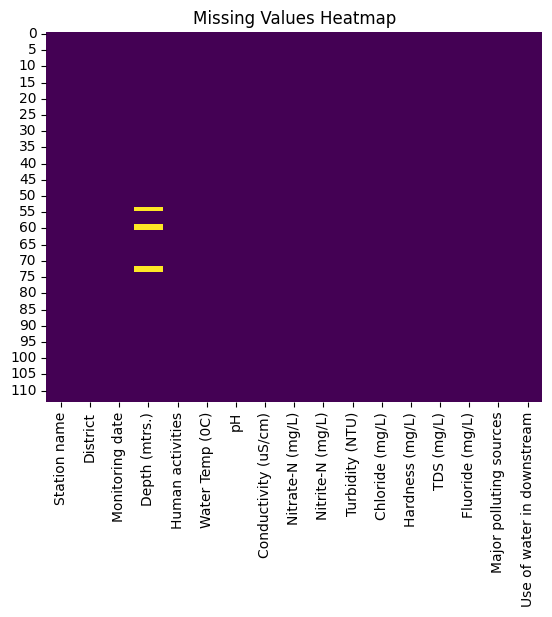

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Detect Outliers**

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = outliers

        print(f'Outliers in {col}:')
        print(outliers)
        print(f'Total outliers in {col}: {len(outliers)}')
        print('-' * 50)

# Numerical columns to check for outliers
numerical_columns = ['Depth (mtrs.)', 'Water Temp (0C)', 'pH', 'Conductivity (uS/cm)',
                     'Nitrate-N (mg/L)', 'Nitrite-N (mg/L)', 'Turbidity (NTU)',
                     'Chloride (mg/L)', 'Hardness (mg/L)', 'TDS (mg/L)', 'Fluoride (mg/L)']
# Detect outliers
detect_outliers_iqr(data, numerical_columns)

Outliers in Depth (mtrs.):
                                         Station name  District  \
74  Anumalapalle Cheruvu, Anumalapalle (V),\nRache...  Prakasam   
75                                 Krishnapatnam Port   Nellore   
80                                    Pampula Cheruvu   Krishna   
81  Cumbum Cheruvu, Cumbum (V & M),\nPrakasam Dist...  Prakasam   
84  Sea water, Pakala Beach, Pakala (V),\nSingaray...  Prakasam   
85       Sea Water, Bay of Bengal, Surya Lanka\nBeach   Bapatla   
88                                  Krishna Mangroves   Krishna   

   Monitoring date  Depth (mtrs.)        Human activities  Water Temp (0C)  \
74      2024-03-12         100.00  Domestic & Agriculture             22.0   
75      2024-03-04           0.03                 Fishing             24.0   
80      2024-03-11           2.00                  Others             26.0   
81      2024-03-12           2.00  Domestic & Agriculture             23.0   
84      2024-03-11         100.00             

**Visualizing outliers**

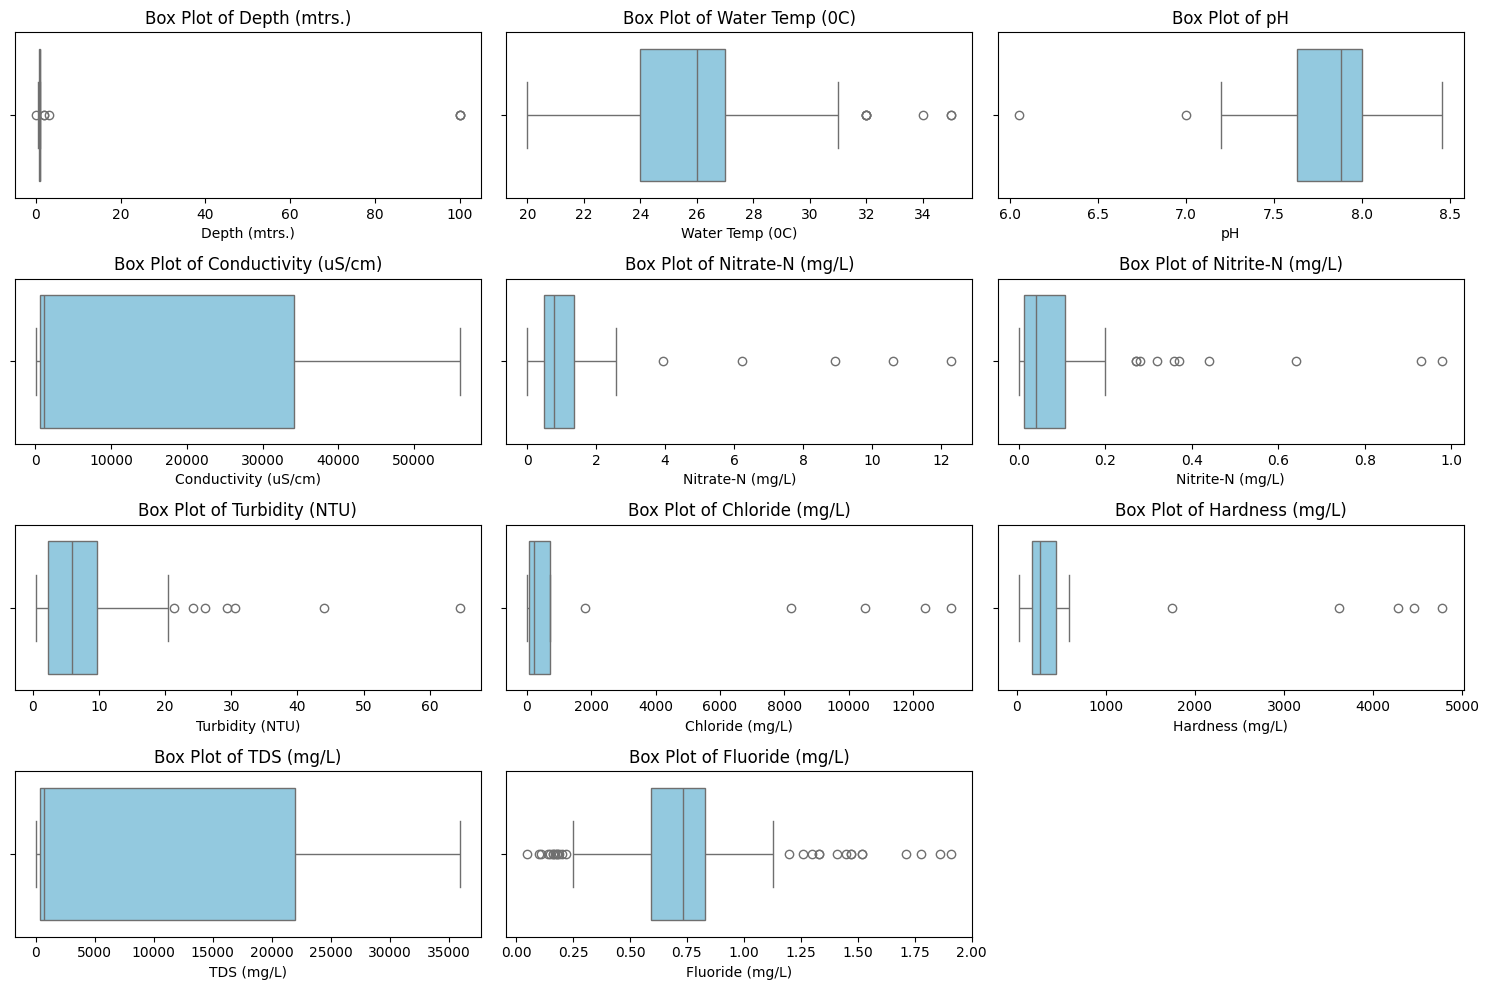

In [ ]:
# Numerical columns to visualize
numerical_columns = ['Depth (mtrs.)', 'Water Temp (0C)', 'pH', 'Conductivity (uS/cm)',
                     'Nitrate-N (mg/L)', 'Nitrite-N (mg/L)', 'Turbidity (NTU)',
                     'Chloride (mg/L)', 'Hardness (mg/L)', 'TDS (mg/L)', 'Fluoride (mg/L)']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a box plot for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)  # Create a grid of subplots
    sns.boxplot(x=data[col], color='skyblue')  # Create the boxplot
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust the layout
plt.show()

**Handling outliers - Box Cox Transformation**

 Box-Cox transformation is a powerful technique used to stabilize variance and make the data more normally distributed. It's particularly useful for data that is positively skewed and can help mitigate the impact of outliers.

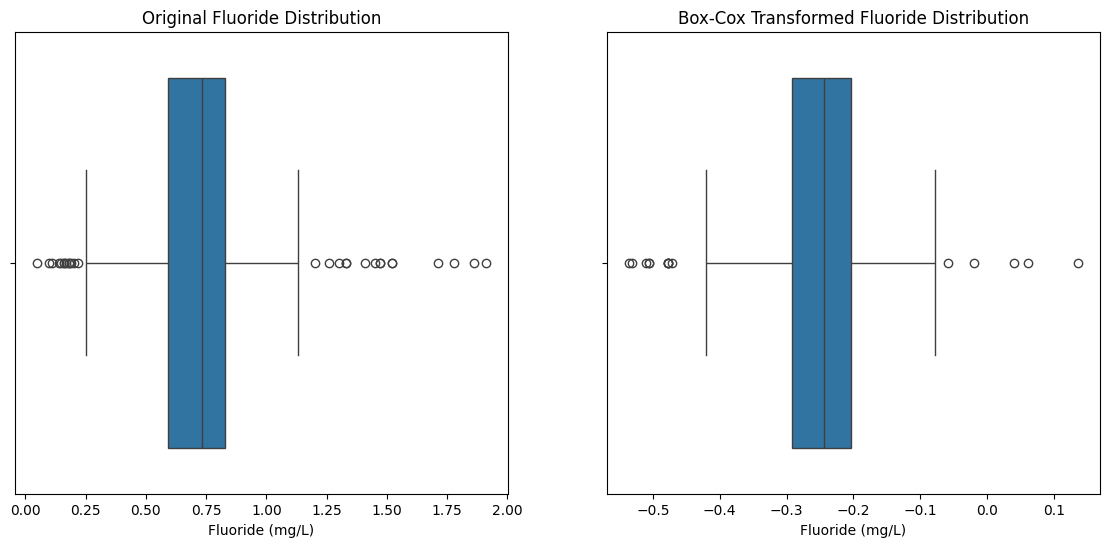

In [ ]:
transformed_data = data.copy()

# Function to identify outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Applying the Box-Cox transformation
def boxcox_transform(column):
    # Ensure the data is positive for Box-Cox
    column_positive = column[column > 0]
    if len(column_positive) == 0:  # Check if there's any positive value
        return column

    transformed, _ = stats.boxcox(column_positive)
    # Create a Series with the same index as the original column
    transformed_series = pd.Series(np.nan, index=column.index)
    transformed_series[column > 0] = transformed  # Assign transformed values only to the positive entries
    return transformed_series

# Example for 'Fluoride (mg/L)' column
lower_bound, upper_bound = detect_outliers_iqr(data['Fluoride (mg/L)'])
transformed_data['Fluoride (mg/L)'] = boxcox_transform(data['Fluoride (mg/L)'].where((data['Fluoride (mg/L)'] >= lower_bound) & (data['Fluoride (mg/L)'] <= upper_bound)))

# Visualizing the results
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Fluoride (mg/L)'])
plt.title('Original Fluoride Distribution')

# Transformed
plt.subplot(1, 2, 2)
sns.boxplot(x=transformed_data['Fluoride (mg/L)'])
plt.title('Box-Cox Transformed Fluoride Distribution')

plt.show()


**Univariate analysis**

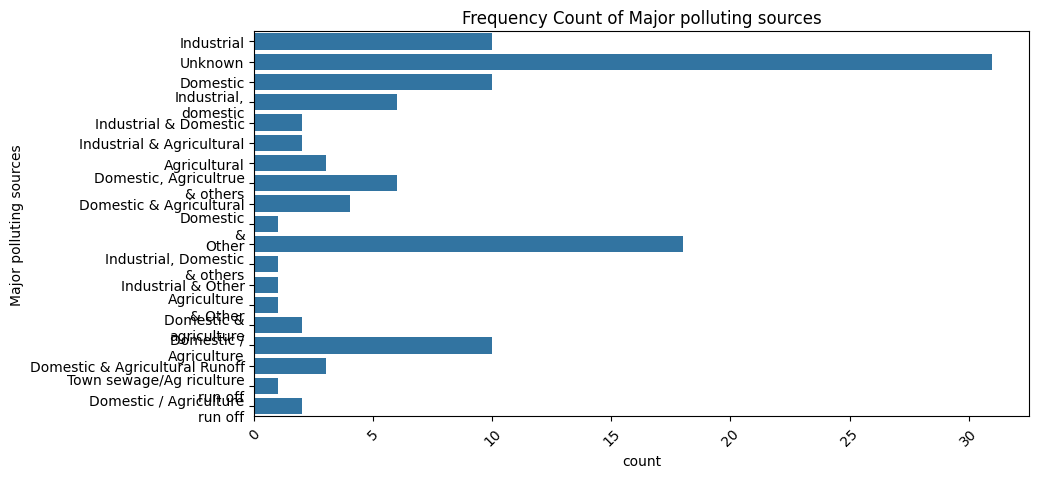

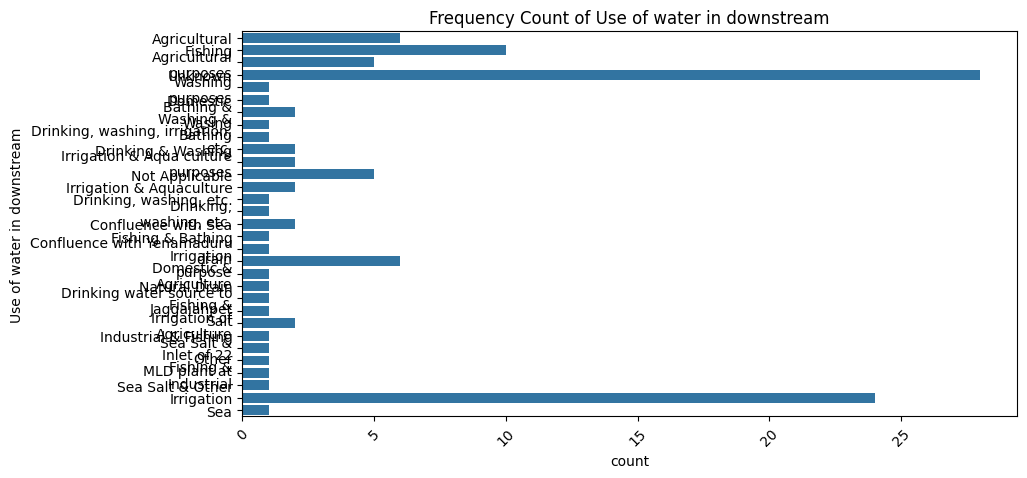

Descriptive statistics for Depth (mtrs.):
count    109.000000
mean       3.613486
std       16.293528
min        0.030000
25%        0.750000
50%        1.000000
75%        1.000000
max      100.000000
Name: Depth (mtrs.), dtype: float64


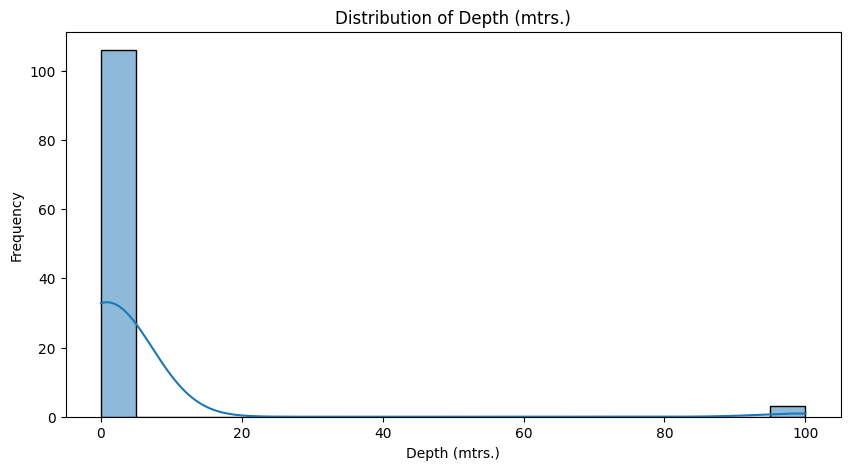

Descriptive statistics for Water Temp (0C):
count    114.000000
mean      25.848214
std        2.762613
min       20.000000
25%       24.000000
50%       26.000000
75%       27.000000
max       35.000000
Name: Water Temp (0C), dtype: float64


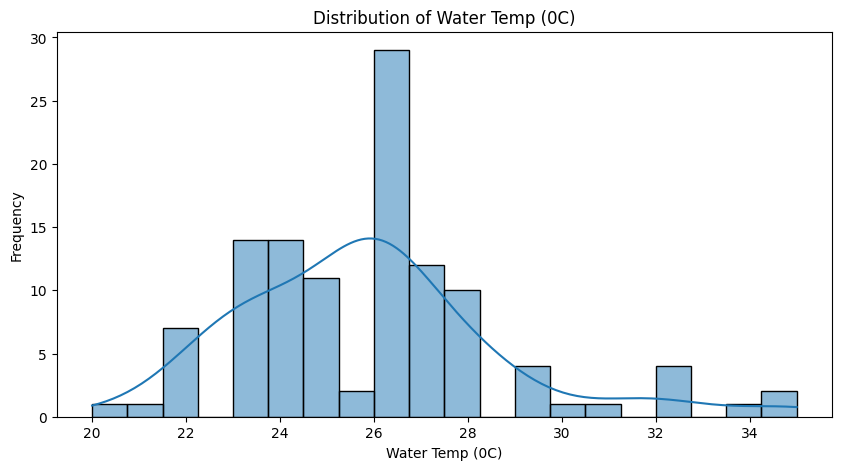

Descriptive statistics for pH:
count    114.000000
mean       7.803246
std        0.317503
min        6.050000
25%        7.630000
50%        7.880000
75%        8.000000
max        8.460000
Name: pH, dtype: float64


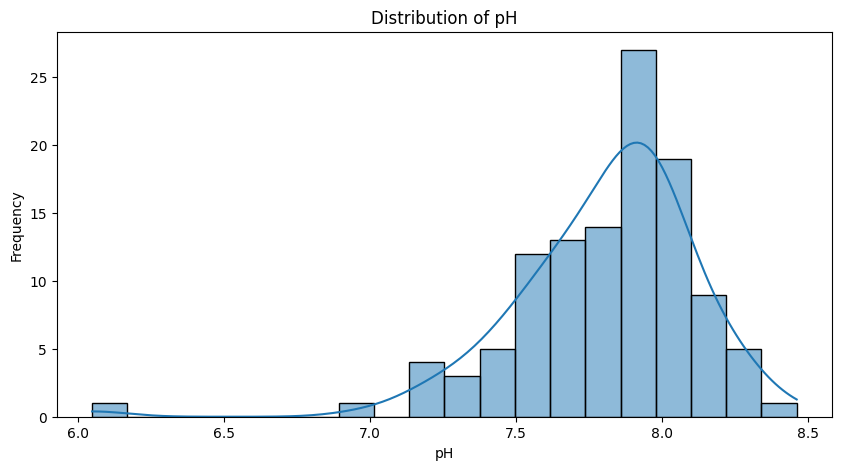

Descriptive statistics for Conductivity (uS/cm):
count      114.000000
mean     13901.342105
std      20126.515415
min         77.000000
25%        535.250000
50%       1179.500000
75%      34140.000000
max      56000.000000
Name: Conductivity (uS/cm), dtype: float64


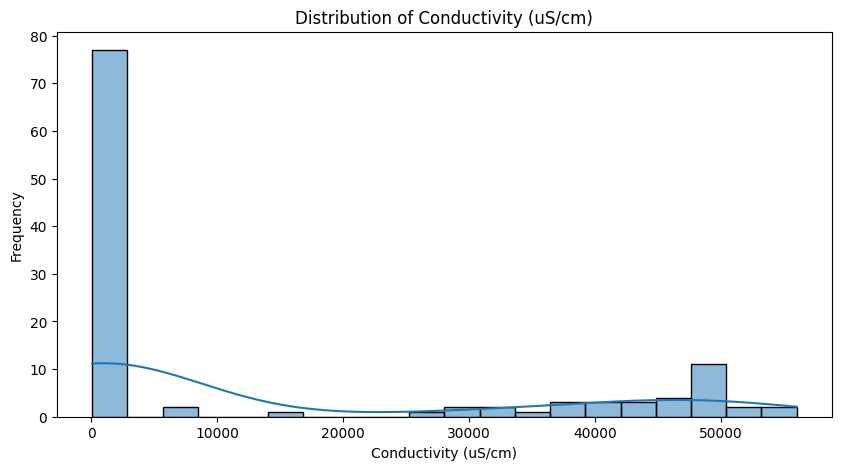

Descriptive statistics for Nitrate-N (mg/L):
count    114.000000
mean       1.237281
std        1.763070
min        0.010000
25%        0.500000
50%        0.785000
75%        1.357500
max       12.290000
Name: Nitrate-N (mg/L), dtype: float64


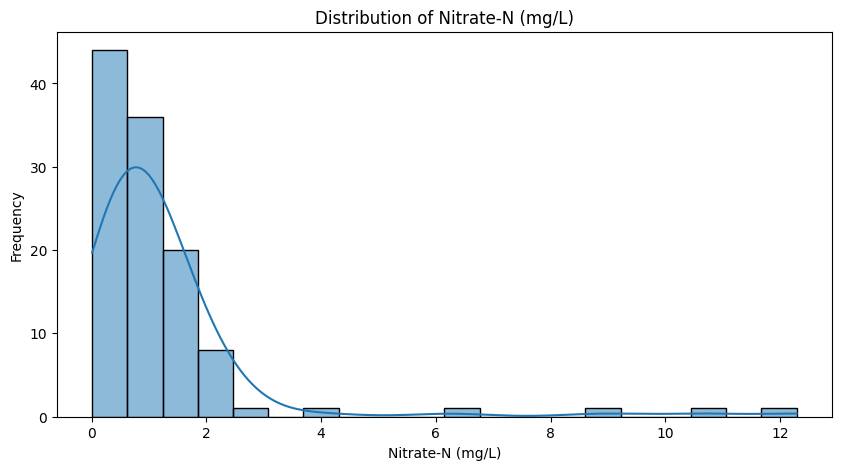

Descriptive statistics for Nitrite-N (mg/L):
count    114.000000
mean       0.091754
std        0.152862
min        0.000000
25%        0.012500
50%        0.040000
75%        0.107500
max        0.980000
Name: Nitrite-N (mg/L), dtype: float64


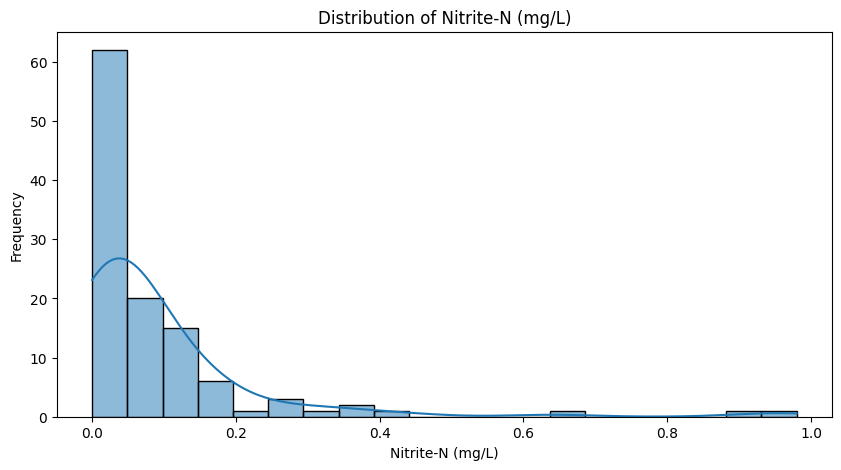

Descriptive statistics for Turbidity (NTU):
count    114.000000
mean       8.156857
std        8.858507
min        0.500000
25%        2.250000
50%        5.910000
75%        9.675000
max       64.500000
Name: Turbidity (NTU), dtype: float64


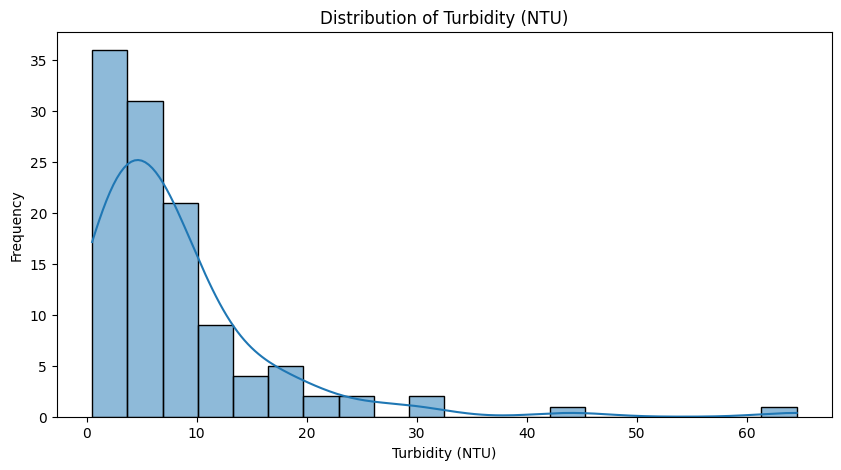

Descriptive statistics for Chloride (mg/L):
count      114.000000
mean       706.468354
std       2039.613497
min         15.000000
25%         70.500000
50%        214.000000
75%        706.468354
max      13179.000000
Name: Chloride (mg/L), dtype: float64


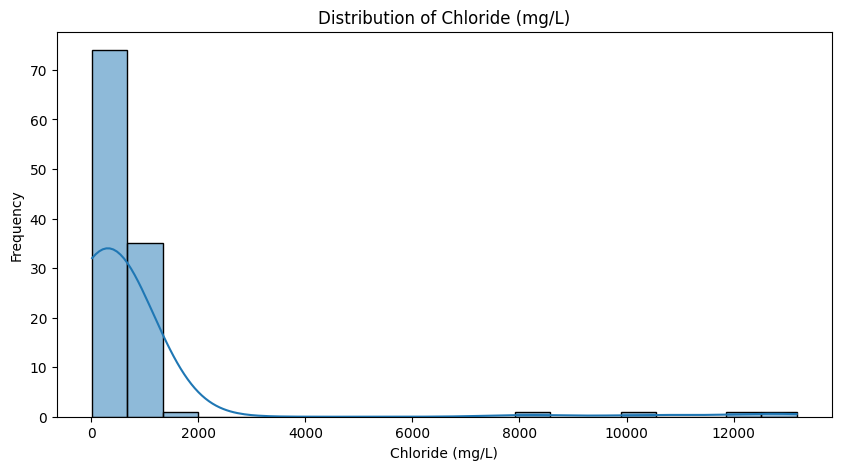

Descriptive statistics for Hardness (mg/L):
count     114.000000
mean      440.822785
std       764.929423
min        23.000000
25%       168.000000
50%       264.000000
75%       440.822785
max      4780.000000
Name: Hardness (mg/L), dtype: float64


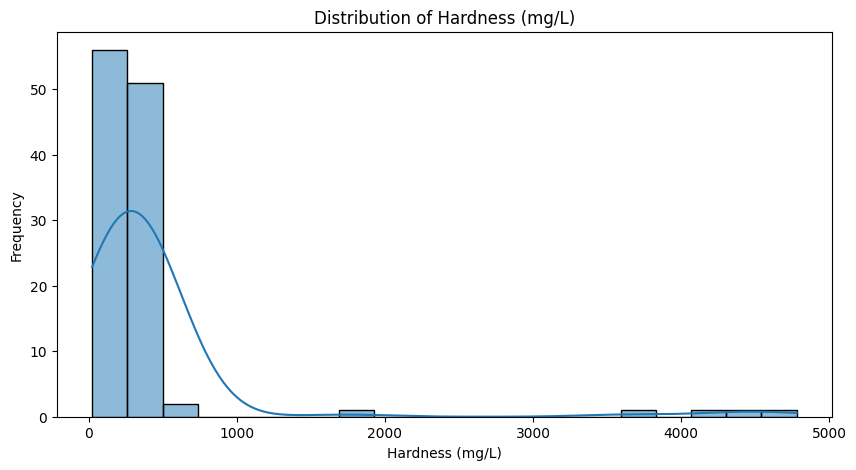

Descriptive statistics for TDS (mg/L):
count      114.000000
mean      9050.342105
std      13162.818616
min         41.000000
25%        345.000000
50%        721.000000
75%      21934.000000
max      35900.000000
Name: TDS (mg/L), dtype: float64


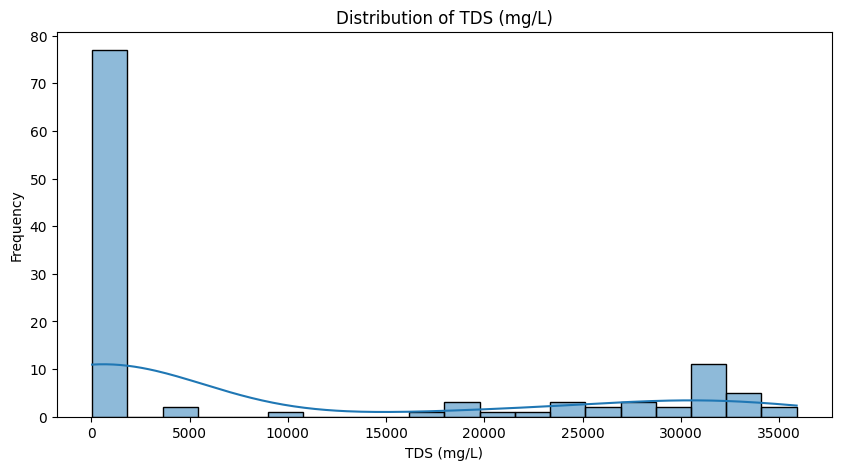

Descriptive statistics for Fluoride (mg/L):
count    114.000000
mean       0.743431
std        0.381966
min        0.050000
25%        0.592500
50%        0.735000
75%        0.830000
max        1.910000
Name: Fluoride (mg/L), dtype: float64


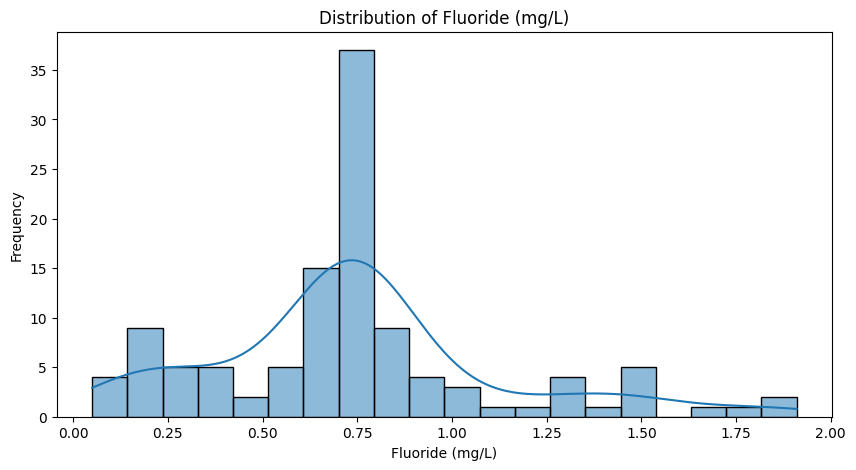

In [ ]:
# Analyze categorical columns
categorical_columns = ['Major polluting sources', 'Use of water in downstream']

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(f'Frequency Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Analyze numerical columns
numerical_columns = ['Depth (mtrs.)', 'Water Temp (0C)', 'pH', 'Conductivity (uS/cm)',
                     'Nitrate-N (mg/L)', 'Nitrite-N (mg/L)', 'Turbidity (NTU)',
                     'Chloride (mg/L)', 'Hardness (mg/L)', 'TDS (mg/L)', 'Fluoride (mg/L)']

# Descriptive statistics
for col in numerical_columns:
    print(f'Descriptive statistics for {col}:')
    print(data[col].describe())
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Bi-variate Analysis (With fluoride)**

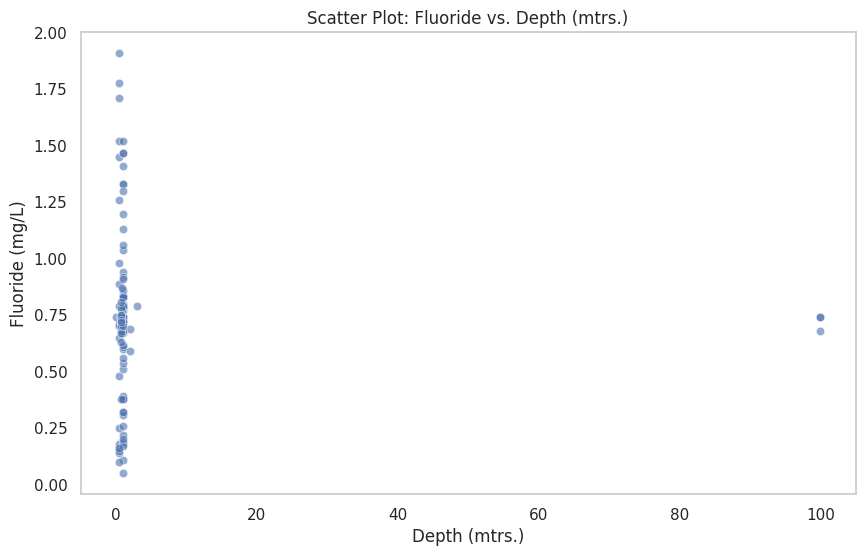

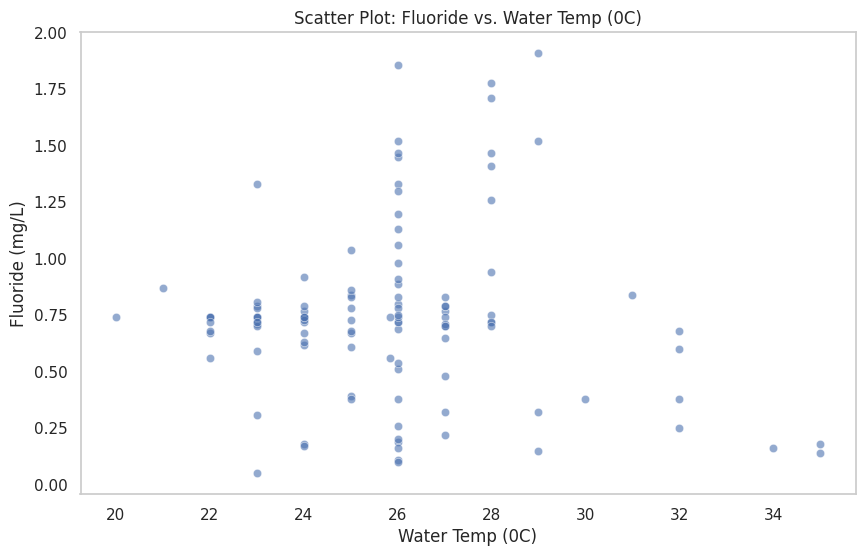

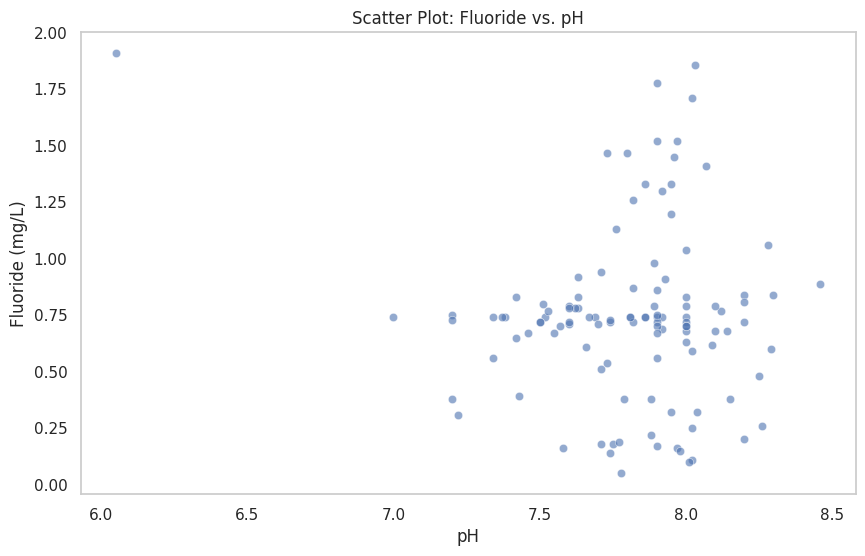

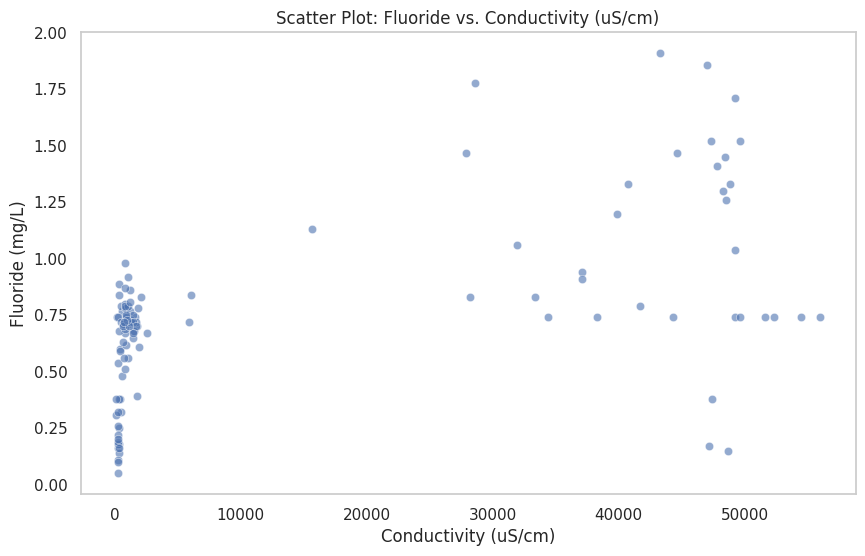

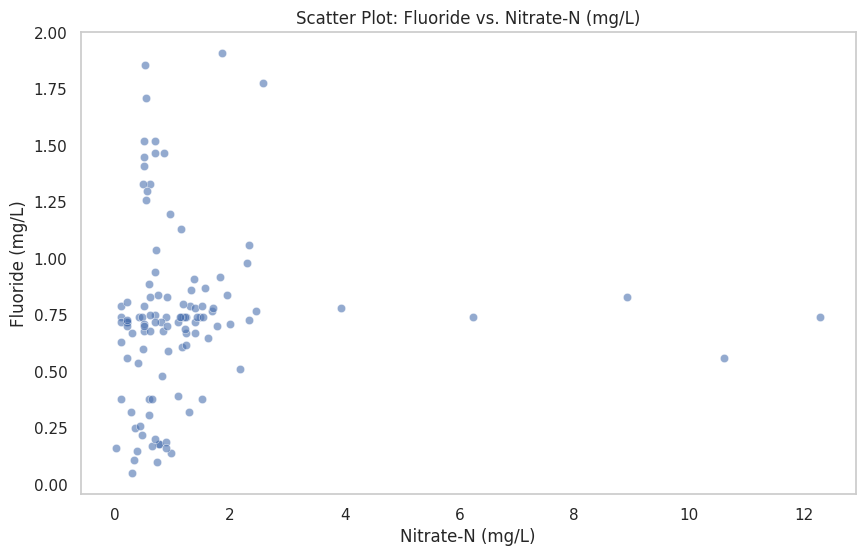

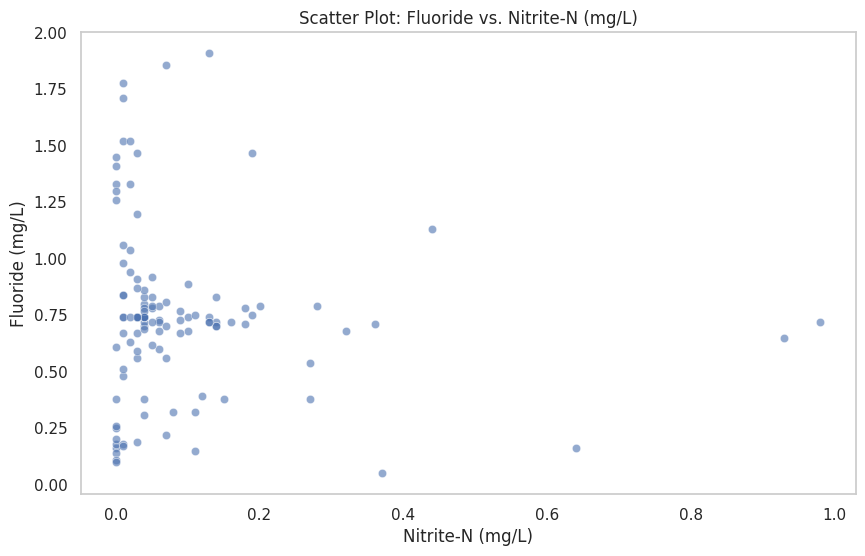

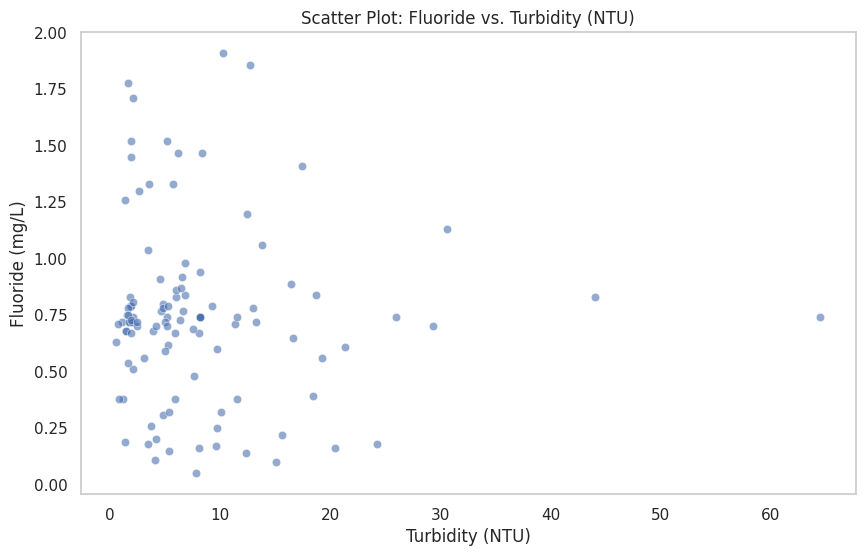

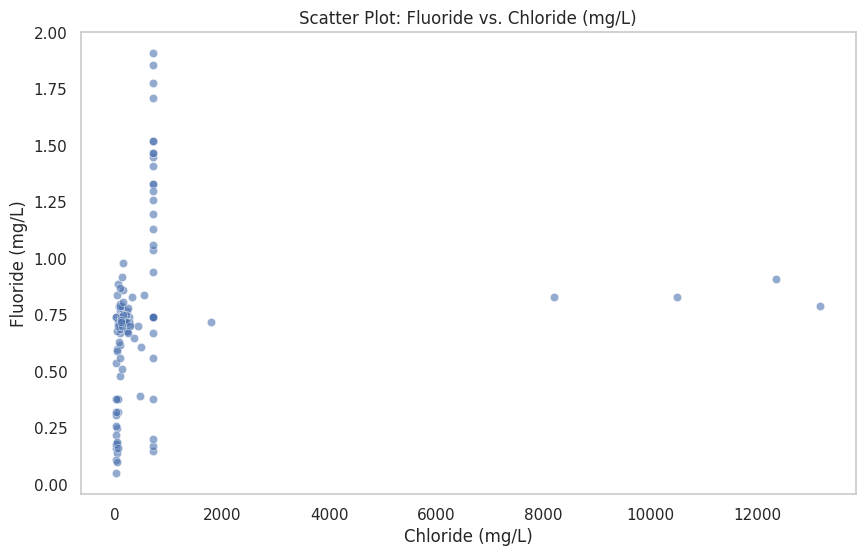

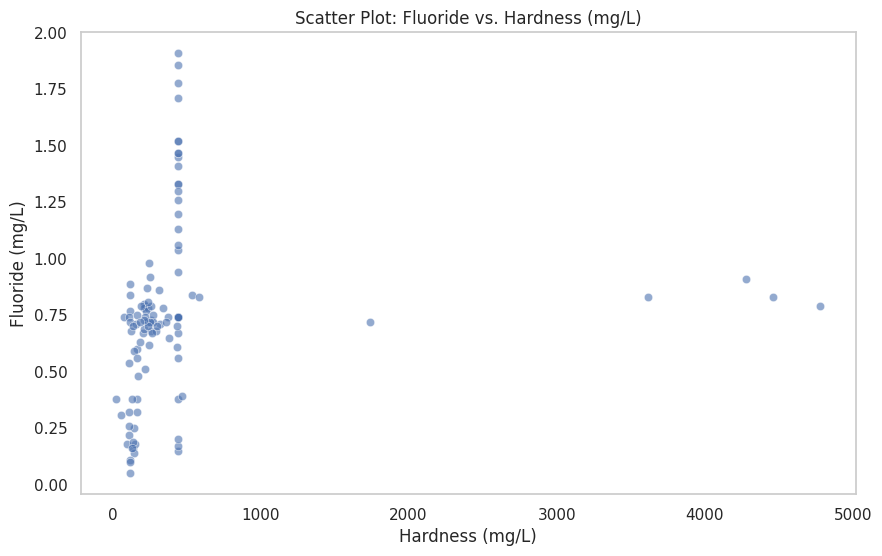

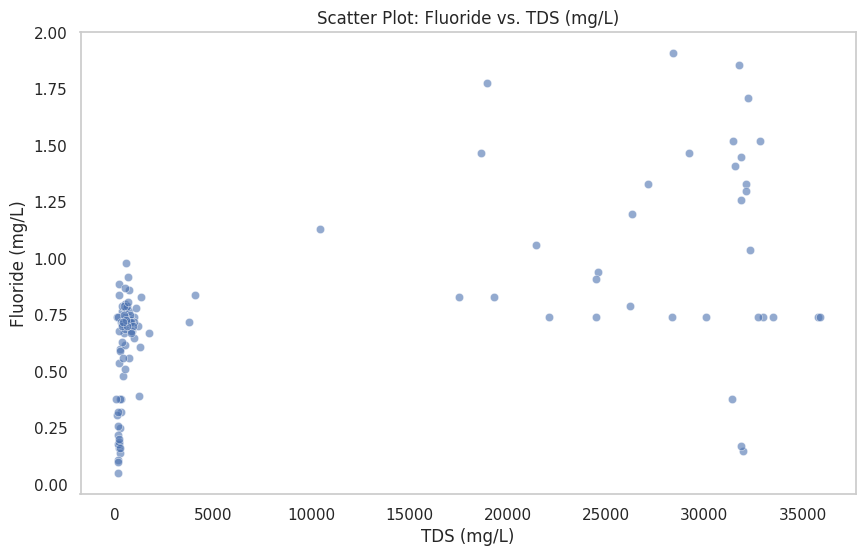

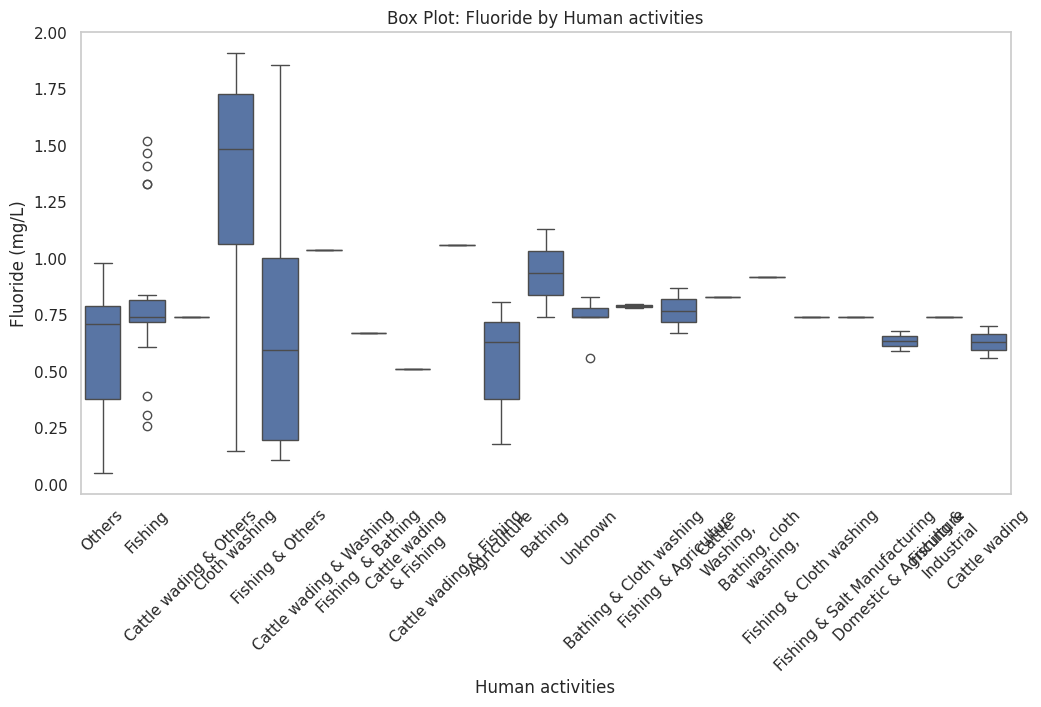

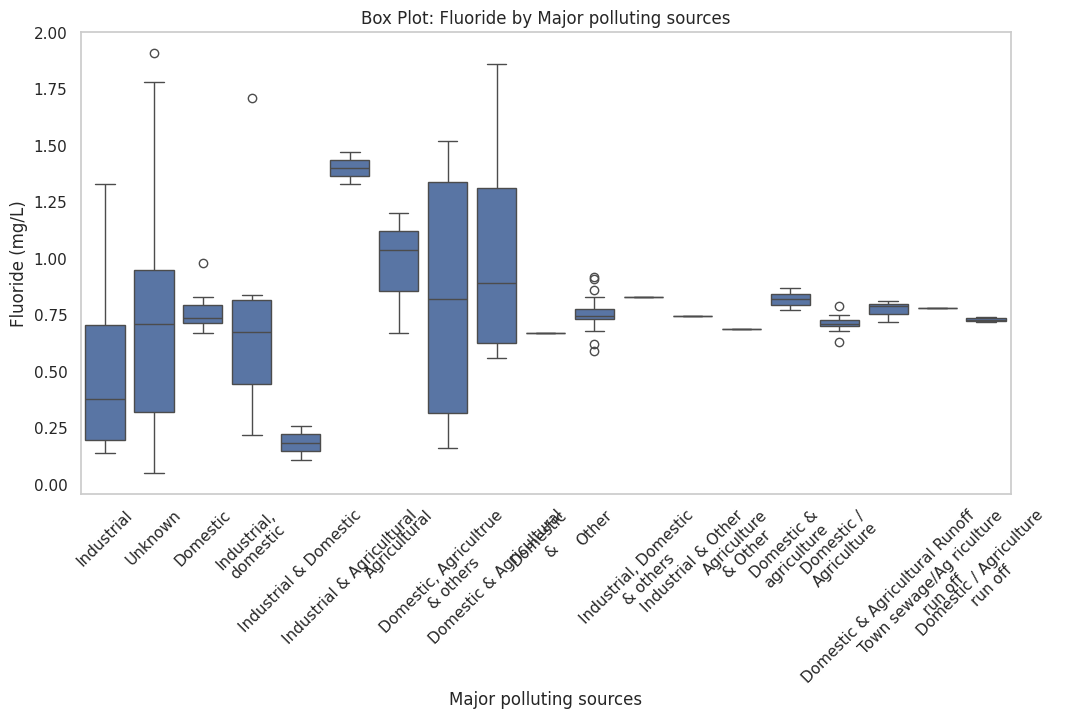

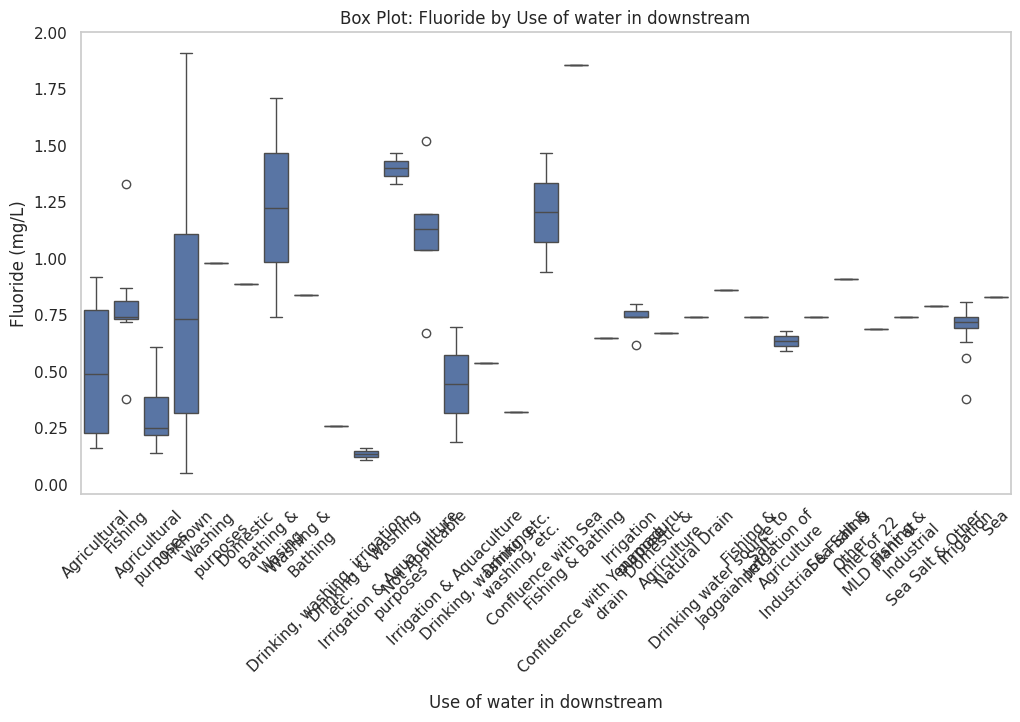

In [ ]:
# Set plot style
sns.set(style='whitegrid')

# 1. Bivariate Analysis with Numerical Columns
numerical_columns = [
    'Depth (mtrs.)', 'Water Temp (0C)', 'pH',
    'Conductivity (uS/cm)', 'Nitrate-N (mg/L)',
    'Nitrite-N (mg/L)', 'Turbidity (NTU)',
    'Chloride (mg/L)', 'Hardness (mg/L)', 'TDS (mg/L)'
]

# Scatter plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=column, y='Fluoride (mg/L)', alpha=0.6)
    plt.title(f'Scatter Plot: Fluoride vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Fluoride (mg/L)')
    plt.grid()
    plt.show()

# 2. Bivariate Analysis with Categorical Columns
categorical_columns = [
    'Human activities', 'Major polluting sources',
    'Use of water in downstream'
]

# Box plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=column, y='Fluoride (mg/L)')
    plt.title(f'Box Plot: Fluoride by {column}')
    plt.xticks(rotation=45)
    plt.ylabel('Fluoride (mg/L)')
    plt.grid(axis='y')
    plt.show()

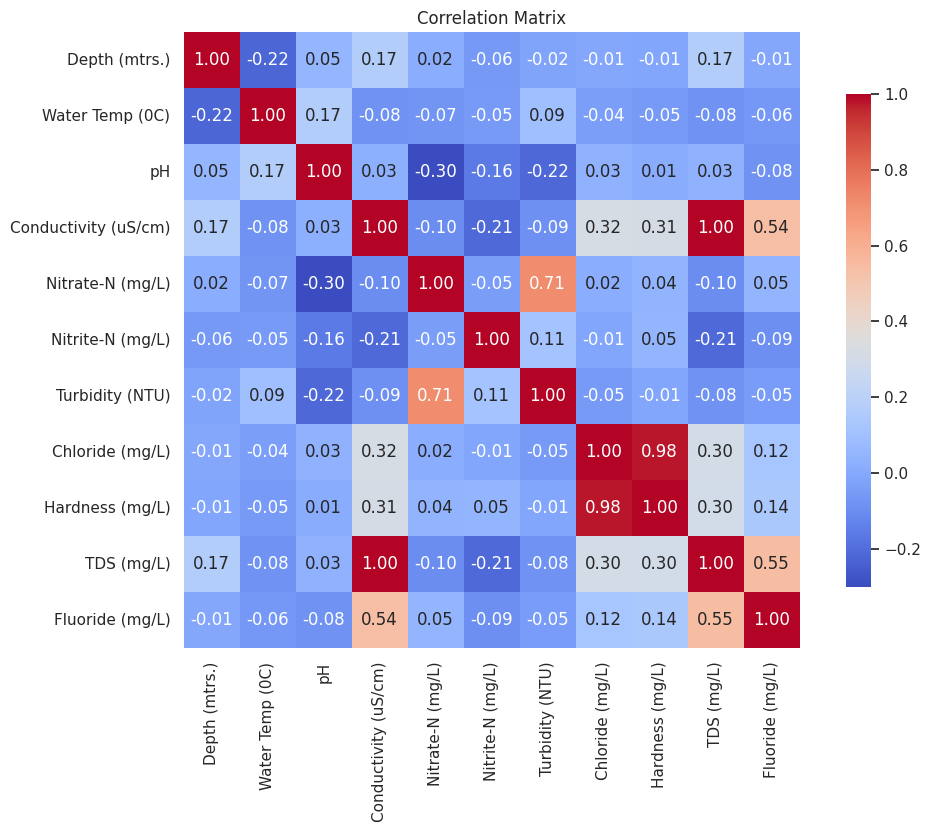

In [ ]:
#CORRELATION MATRIX

# Filter numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

**Multi-variate Analysis**

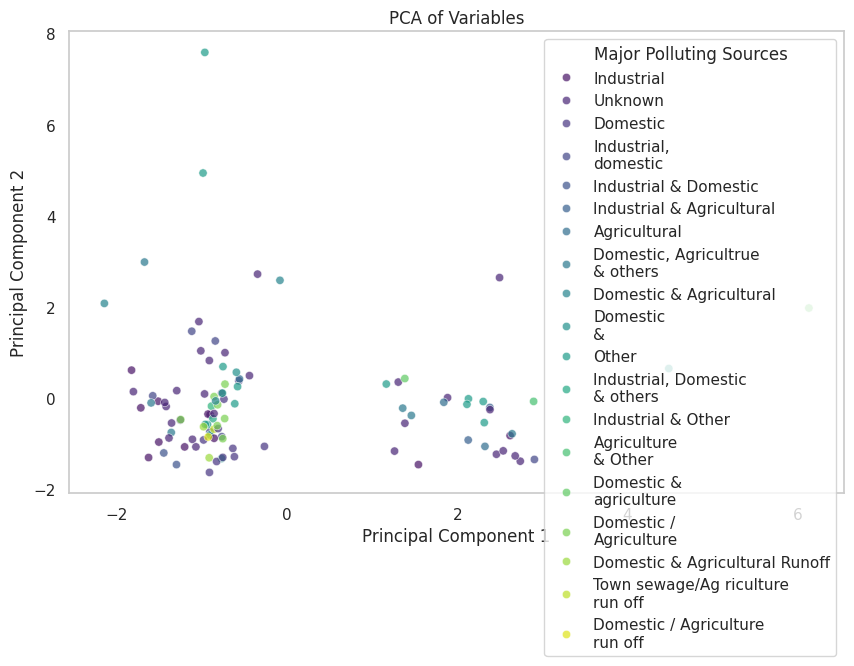

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Filter numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Remove rows with any missing values
numeric_data = numeric_data.dropna()  # Drop rows with NaN

# Standardize the data
scaled_data = StandardScaler().fit_transform(numeric_data)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add labels for plotting, making sure to align with dropped rows
pca_df['Major polluting sources'] = data.loc[numeric_data.index, 'Major polluting sources']

# Visualize PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Major polluting sources', palette='viridis', alpha=0.7)
plt.title('PCA of Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Major Polluting Sources')
plt.grid()
plt.show()

**3. Multiple Regression Analysis**

you could predict Fluoride (mg/L) using other numeric features.


In [ ]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (y)
X = numeric_data.drop(columns='Fluoride (mg/L)')
y = numeric_data['Fluoride (mg/L)']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Fluoride (mg/L)   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     6.017
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.56e-07
Time:                        17:23:49   Log-Likelihood:                -21.202
No. Observations:                 109   AIC:                             64.40
Df Residuals:                      98   BIC:                             94.01
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2096 

#**VISUALISATIONS**

**Bar Charts / Line Graphs:**

compare concentrations between different districts.

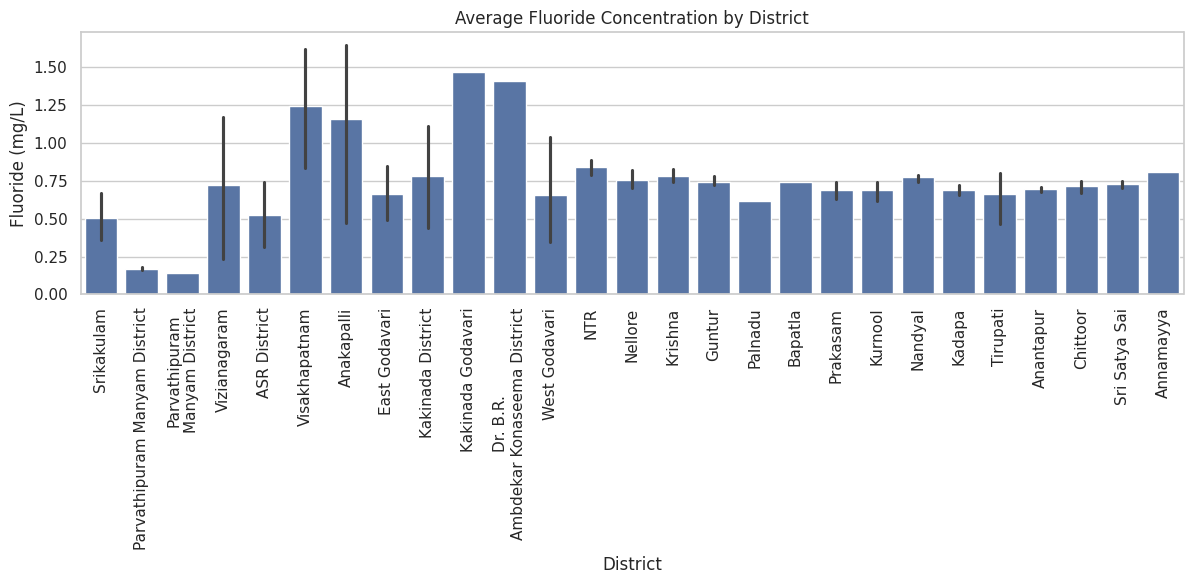

In [ ]:
# Bar plot for average fluoride concentration by district
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Fluoride (mg/L)', data=data)
plt.title('Average Fluoride Concentration by District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Histograms / Box Plots:**

To visualize the distribution of fluoride concentrations.

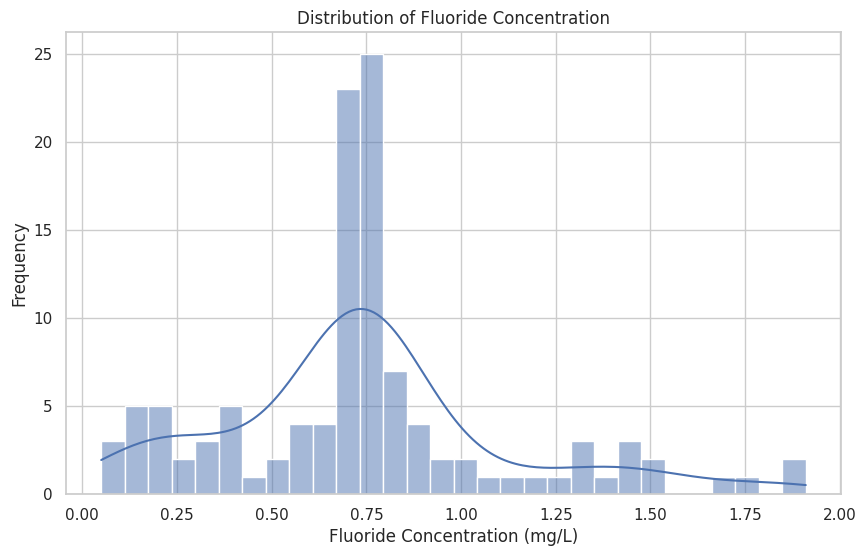

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fluoride (mg/L)'], bins=30, kde=True)
plt.title('Distribution of Fluoride Concentration')
plt.xlabel('Fluoride Concentration (mg/L)')
plt.ylabel('Frequency')
plt.show()